<a href="https://colab.research.google.com/github/ashish-pro/bank-loan-case-study/blob/main/Bank_Loan_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all packages**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Reading CSV Files**

In [3]:
application_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bank Loan Case Study/Loan-DataSet/application_data.csv")
previous_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bank Loan Case Study/Loan-DataSet/previous_application.csv")

In [4]:
# To check wether the data is properly loaded or not we use head() function to see first five rows from dataframe
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Finding Shape and Info about Dataframe**

In [5]:
application_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
print("The dimension of Application_data:",application_data.shape)
print("The dimension of Previous_Application:",previous_data.shape)

The dimension of Application_data: (307511, 122)
The dimension of Previous_Application: (1670214, 37)


**Numerical Variable**

In [7]:
application_data.describe().style.background_gradient()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,306851.000000,246546.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,0.514393,0.510853,0.117440,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.08795

# **Data Cleaning for Application Data**

*Indentify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)*


In [8]:
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

# **Plotting Graph**

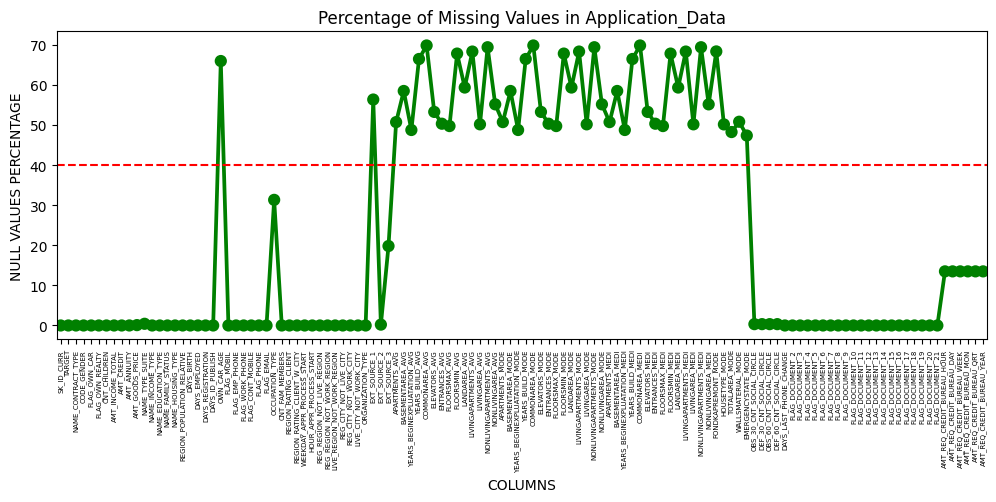

In [11]:
#Plotting in a Graph
null_Application = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
null_Application.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(12,4))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data=null_Application, color='green')
plt.xticks(rotation =90,fontsize =5)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing Values in Application_Data")
plt.ylabel("NULL VALUES PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [12]:
round(application_data.isnull().sum() / application_data.shape[0] * 100.00,2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [13]:
emp1=application_data.isnull().sum()
emp1=emp1[emp1.values>(0.4*len(emp1))]
emp1

AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
EXT_SOURCE_1                  173378
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 64, dtype: int64

In [14]:
emp1

AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
EXT_SOURCE_1                  173378
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 64, dtype: int64

In [15]:
values_0=application_data['AMT_GOODS_PRICE'].median()
application_data.loc[application_data['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=values_0

In [16]:
emp1 = list(emp1[emp1.values>=0.4].index)
application_data.drop(labels=emp1,axis=1,inplace=True)
print(len(emp1))

64


In [17]:
#Checking other columns with less % of null values
application_data.isnull().sum()/len(application_data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


***Note:*** *From the above graph it is evident that there are many columns with the missing values percentage greater than 40%. Since 40% is a significant number for missing values in the dataset, we can drop these columns.*

In [18]:
values=application_data['AMT_ANNUITY'].median()
application_data.loc[application_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [19]:
application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [20]:
#We will remove unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 
        'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
          'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
         'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

application_data.drop(labels=unwanted,axis=1,inplace=True)

In [21]:
application_data.shape

(307511, 29)

# **Data Cleaning for previous_data dataset**

In [22]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
previous_data.describe().style.background_gradient() 

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.000000,1670214.000000,1297979.000000,1670214.000000,1670213.000000,774370.000000,1284699.000000,1670214.000000,1670214.000000,774370.000000,5951.000000,5951.000000,1670214.000000,1670214.000000,1297984.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1923089.135331,278357.174099,15955.120659,175233.860360,196114.021218,6697.402139,227847.279283,12.484182,0.996468,0.079637,0.188357,0.773503,-880.679668,313.951115,16.054082,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,532597.958696,102814.823849,14782.137335,292779.762386,318574.616547,20921.495410,315396.557937,3.334028,0.059330,0.107823,0.087671,0.100879,779.099667,7127.443459,14.567288,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1000001.000000,100001.000000,0.000000,0.000000,0.000000,-0.900000,0.000000,0.000000,0.000000,-0.000015,0.034781,0.373150,-2922.000000,-1.000000,0.000000,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1461857.250000,189329.000000,6321.780000,18720.000000,24160.500000,0.000000,50841.000000,10.000000,1.000000,0.000000,0.160716,0.715645,-1300.000000,-1.000000,6.000000,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1923110.500000,278714.500000,11250.000000,71046.000000,80541.000000,1638.000000,112320.000000,12.000000,1.000000,0.051605,0.189122,0.835095,-581.000000,3.000000,12.000000,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2384279.750000,367514.000000,20658.420000,180360.000000,216418.500000,7740.000000,234000.000000,15.000000,1.000000,0.108909,0.193330,0.852537,-280.000000,82.000000,24.000000,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2845382.000000,456255.000000,418058.145000,6905160.000000,6905160.000000,3060045.000000,6905160.000000,23.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,4000000.000000,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [24]:
previous_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

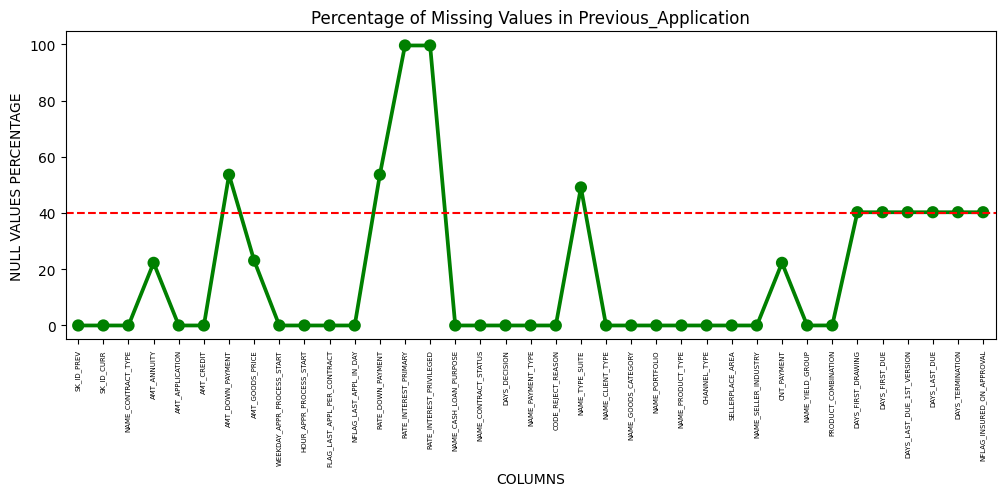

In [26]:
#Plotting in a Graph
null_Previous = pd.DataFrame((previous_data.isnull().sum())*100/previous_data.shape[0]).reset_index()
null_Previous.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(12,4))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data=null_Previous, color='green')
plt.xticks(rotation =90,fontsize =5)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing Values in Previous_Application")
plt.ylabel("NULL VALUES PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [27]:
values_1=previous_data['AMT_ANNUITY'].median()

previous_data.loc[previous_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values_1
values_2=previous_data['AMT_GOODS_PRICE'].mode()[0]

previous_data.loc[previous_data['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=values_2
values_3=previous_data['AMT_DOWN_PAYMENT'].mean()

previous_data.loc[previous_data['AMT_DOWN_PAYMENT'].isnull(),'AMT_DOWN_PAYMENT']=values_3
previous_data['CNT_PAYMENT'].fillna(0,inplace = True)
values_2=previous_data['AMT_CREDIT'].mode()[0]

previous_data.loc[previous_data['AMT_CREDIT'].isnull(),'AMT_CREDIT']=values_2

In [28]:
previous_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                          0
AMT_APPLICATION                      0
AMT_CREDIT                           0
AMT_DOWN_PAYMENT                     0
AMT_GOODS_PRICE                      0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [29]:
round(previous_data.isnull().sum()/len(previous_data)*100,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                     0.00
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT                0.00
AMT_GOODS_PRICE                 0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [30]:
# listing the null values columns having more than 40%

emp2=previous_data.isnull().sum()
emp2=emp2[emp2.values>(0.4*len(emp2))]
len(emp2)

11

In [31]:
# 11 columns in Previous_Application have null values more than 40%
#Specifying dropped columns with null count
emp2

RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64

In [32]:
previous_data.shape

(1670214, 37)

# **Finding Outliers in application.csv dataset**

In [33]:
application_data.T

,0,1,2,3,4,5,6,7,8,9,...,307501,307502,307503,307504,307505,307506,307507,307508,307509,307510
SK_ID_CURR,100002,100003,100004,100006,100007,100008,100009,100010,100011,100012,...,456245,456246,456247,456248,456249,456251,456252,456253,456254,456255
TARGET,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,...,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M,M,F,M,F,M,...,F,F,F,F,F,M,F,F,F,F
FLAG_OWN_CAR,N,N,Y,N,N,N,Y,Y,N,N,...,N,N,N,N,N,N,N,N,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,Y,Y,Y,N,Y,Y,Y,N
CNT_CHILDREN,0,0,0,0,0,0,1,0,0,0,...,3,1,0,0,0,0,0,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0,121500.0,99000.0,171000.0,360000.0,112500.0,135000.0,...,81000.0,94500.0,112500.0,153000.0,112500.0,157500.0,72000.0,153000.0,171000.0,157500.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5,513000.0,490495.5,1560726.0,1530000.0,1019610.0,405000.0,...,269550.0,225000.0,345510.0,331920.0,225000.0,254700.0,269550.0,677664.0,370107.0,675000.0
AMT_ANNUITY,24700.5,35698.5,6750.0,29686.5,21865.5,27517.5,41301.0,42075.0,33826.5,20250.0,...,11871.0,10620.0,17770.5,16096.5,22050.0,27558.0,12001.5,29979.0,20205.0,49117.5


In [34]:
#converting negative days into positive value

neg_days = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in neg_days:
    application_data[col] = abs(application_data[col])

In [35]:
application_data.T

,0,1,2,3,4,5,6,7,8,9,...,307501,307502,307503,307504,307505,307506,307507,307508,307509,307510
SK_ID_CURR,100002,100003,100004,100006,100007,100008,100009,100010,100011,100012,...,456245,456246,456247,456248,456249,456251,456252,456253,456254,456255
TARGET,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,...,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M,M,F,M,F,M,...,F,F,F,F,F,M,F,F,F,F
FLAG_OWN_CAR,N,N,Y,N,N,N,Y,Y,N,N,...,N,N,N,N,N,N,N,N,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,Y,Y,Y,N,Y,Y,Y,N
CNT_CHILDREN,0,0,0,0,0,0,1,0,0,0,...,3,1,0,0,0,0,0,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0,121500.0,99000.0,171000.0,360000.0,112500.0,135000.0,...,81000.0,94500.0,112500.0,153000.0,112500.0,157500.0,72000.0,153000.0,171000.0,157500.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5,513000.0,490495.5,1560726.0,1530000.0,1019610.0,405000.0,...,269550.0,225000.0,345510.0,331920.0,225000.0,254700.0,269550.0,677664.0,370107.0,675000.0
AMT_ANNUITY,24700.5,35698.5,6750.0,29686.5,21865.5,27517.5,41301.0,42075.0,33826.5,20250.0,...,11871.0,10620.0,17770.5,16096.5,22050.0,27558.0,12001.5,29979.0,20205.0,49117.5


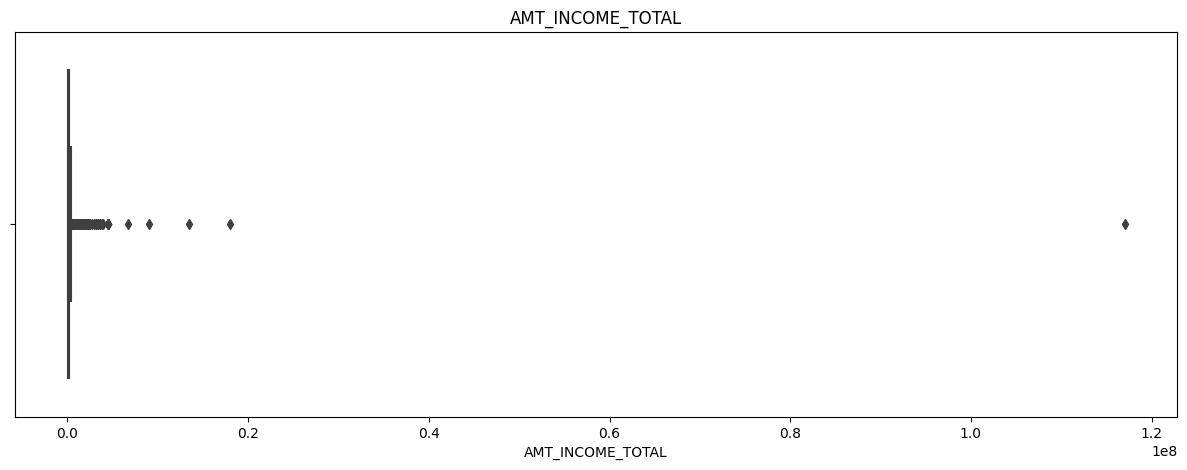

In [36]:
# Identifying Outliers using Scatter plot

plt.figure(figsize = (15,5))
sns.boxplot(x = application_data['AMT_INCOME_TOTAL'])
plt.title('AMT_INCOME_TOTAL')
plt.show()

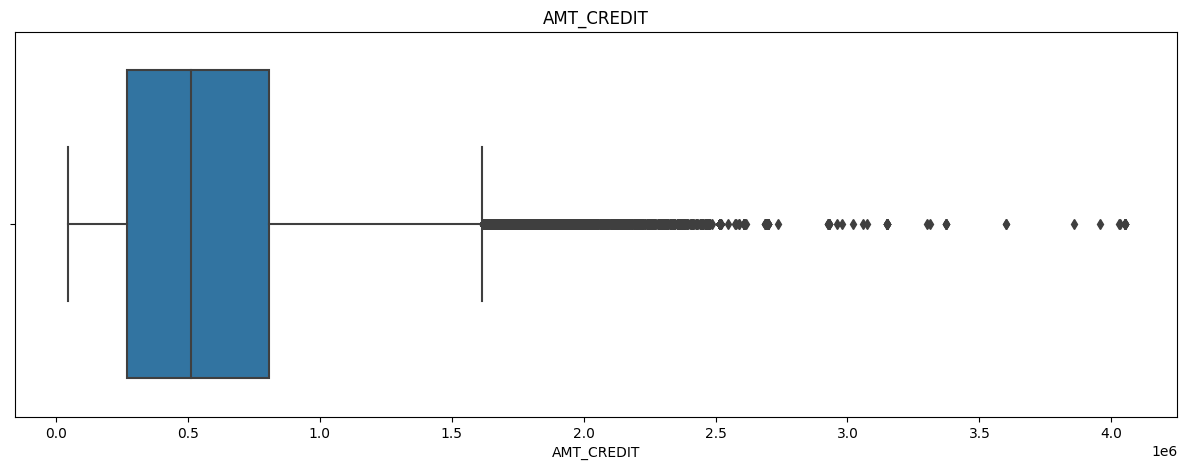

In [37]:
plt.figure(figsize = (15,5))
sns.boxplot(x = application_data['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

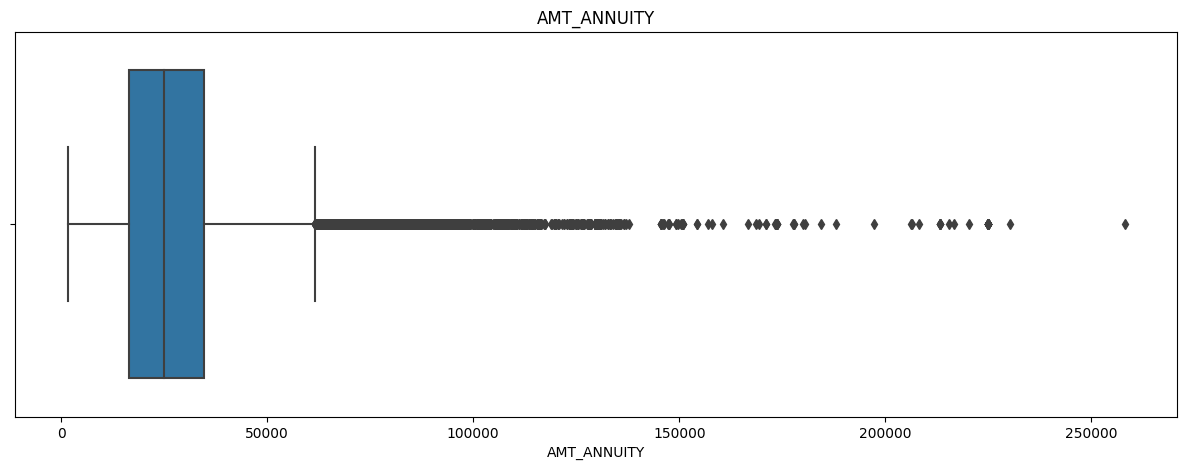

In [38]:
plt.figure(figsize = (15,5))
sns.boxplot(x = application_data['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

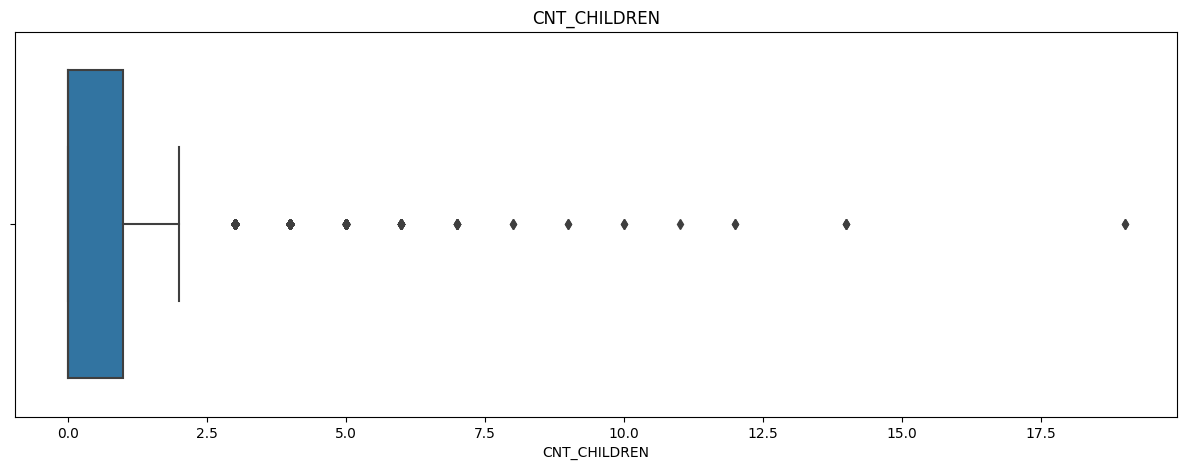

In [39]:
plt.figure(figsize = (15,5))
sns.boxplot(x = application_data['CNT_CHILDREN'])
plt.title('CNT_CHILDREN')
plt.show()

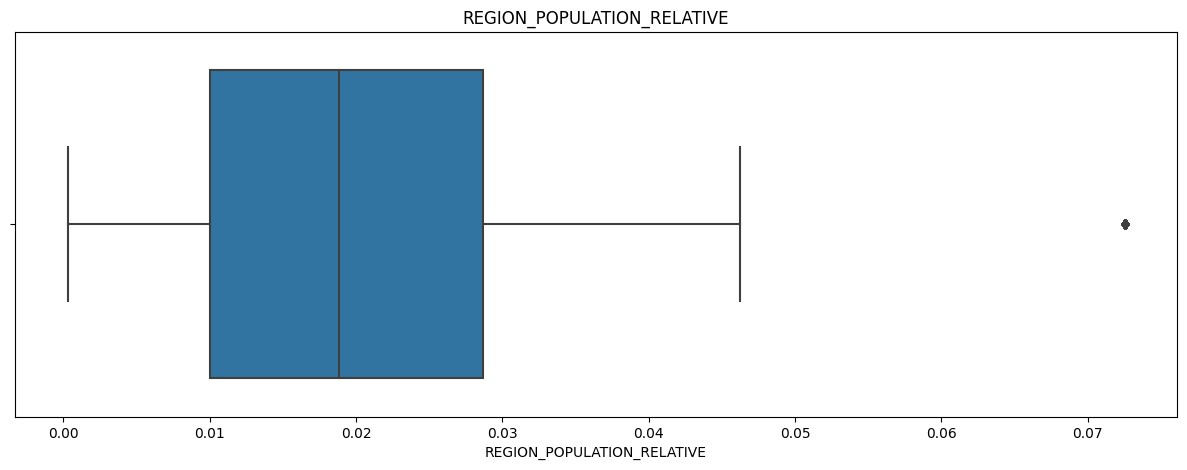

In [40]:
plt.figure(figsize = (15,5))
sns.boxplot(x = application_data['REGION_POPULATION_RELATIVE'])
plt.title('REGION_POPULATION_RELATIVE')
plt.show()

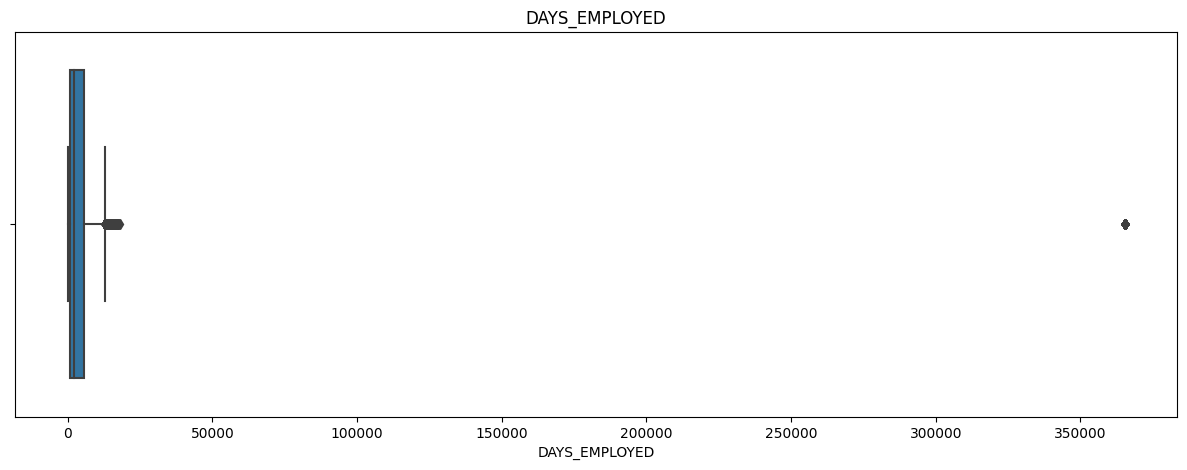

In [41]:
plt.figure(figsize = (15,5))
sns.boxplot(x = application_data['DAYS_EMPLOYED'])
plt.title('DAYS_EMPLOYED')
plt.show()

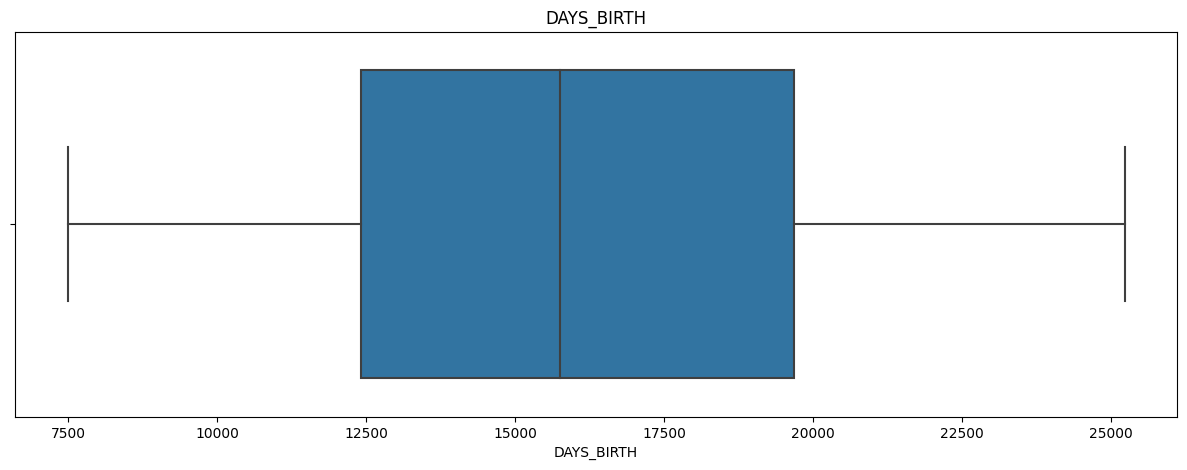

In [42]:
plt.figure(figsize = (15,5))
sns.boxplot(x = application_data['DAYS_BIRTH'])
plt.title('DAYS_BIRTH')
plt.show()

*Insight:*

1. AMT_ANNUITY, AMT_CREDIT,CNT_CHILDREN have some number of outliers.

2. AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income compared to the others.

3. DAYS_BIRTH has no outliers which means the data available is reliable.

4. DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this is an incorrect entry.

# **Finding Outliers in previous_data dataset**

In [43]:
previous_data.T

,0,1,2,3,4,5,6,7,8,9,...,1670204,1670205,1670206,1670207,1670208,1670209,1670210,1670211,1670212,1670213
SK_ID_PREV,2030495,2802425,2523466,2819243,1784265,1383531,2315218,1656711,2367563,2579447,...,1407146,2815130,2459206,1662353,1556789,2300464,2357031,2659632,2785582,2418762
SK_ID_CURR,271877,108129,122040,176158,202054,199383,175704,296299,342292,334349,...,198989,338803,238591,443544,209732,352015,334635,249544,400317,261212
NAME_CONTRACT_TYPE,Consumer loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,...,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Consumer loans,Consumer loans,Consumer loans,Cash loans,Cash loans
AMT_ANNUITY,1730.43,25188.615,15060.735,47041.335,31924.395,23703.93,11250.0,11250.0,11250.0,11250.0,...,36598.095,14584.05,19401.435,12607.875,22299.39,14704.29,6622.02,11520.855,18821.52,16431.3
AMT_APPLICATION,17145.0,607500.0,112500.0,450000.0,337500.0,315000.0,0.0,0.0,0.0,0.0,...,450000.0,135000.0,180000.0,112500.0,315000.0,267295.5,87750.0,105237.0,180000.0,360000.0
AMT_CREDIT,17145.0,679671.0,136444.5,470790.0,404055.0,340573.5,0.0,0.0,0.0,0.0,...,570073.5,182956.5,243936.0,112500.0,436216.5,311400.0,64291.5,102523.5,191880.0,360000.0
AMT_DOWN_PAYMENT,0.0,6697.402139,6697.402139,6697.402139,6697.402139,6697.402139,6697.402139,6697.402139,6697.402139,6697.402139,...,6697.402139,6697.402139,0.0,0.0,6697.402139,0.0,29250.0,10525.5,6697.402139,6697.402139
AMT_GOODS_PRICE,17145.0,607500.0,112500.0,450000.0,337500.0,315000.0,45000.0,45000.0,45000.0,45000.0,...,450000.0,135000.0,180000.0,112500.0,315000.0,267295.5,87750.0,105237.0,180000.0,360000.0
WEEKDAY_APPR_PROCESS_START,SATURDAY,THURSDAY,TUESDAY,MONDAY,THURSDAY,SATURDAY,TUESDAY,MONDAY,MONDAY,SATURDAY,...,THURSDAY,SATURDAY,TUESDAY,MONDAY,THURSDAY,WEDNESDAY,TUESDAY,MONDAY,WEDNESDAY,SUNDAY
HOUR_APPR_PROCESS_START,15,11,11,7,9,8,11,7,15,15,...,12,10,13,10,17,12,15,12,9,10


In [45]:
previous_data['DAYS_DECISION'] = abs(previous_data['DAYS_DECISION'])

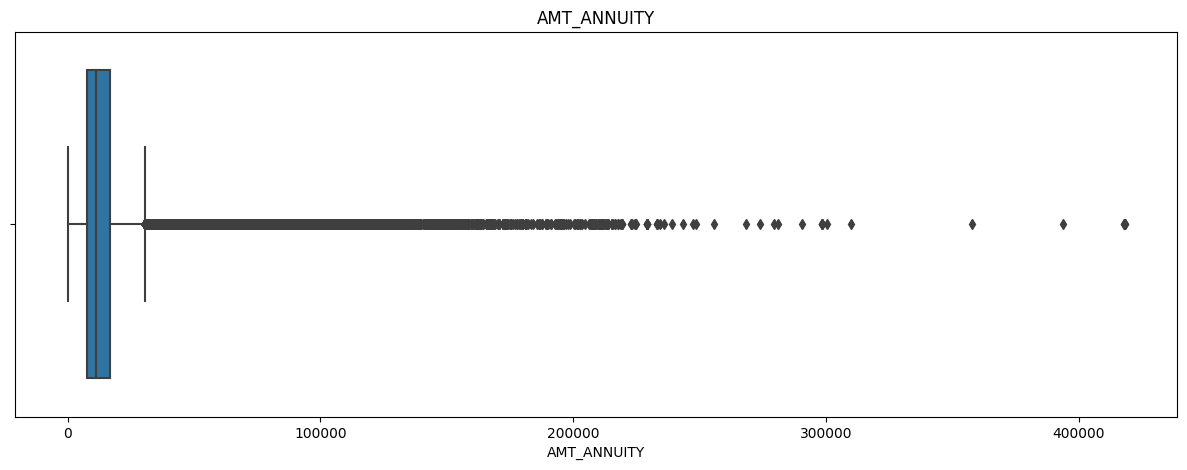

In [46]:
# Identifying outliers using scatter plot

plt.figure(figsize = (15,5))
sns.boxplot(x = previous_data['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

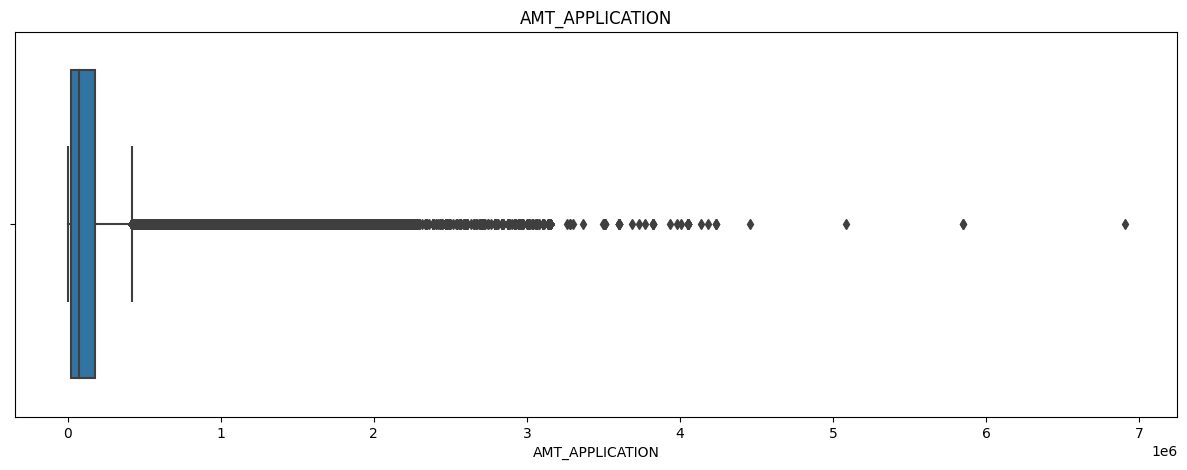

In [47]:
plt.figure(figsize = (15,5))
sns.boxplot(x = previous_data['AMT_APPLICATION'])
plt.title('AMT_APPLICATION')
plt.show()

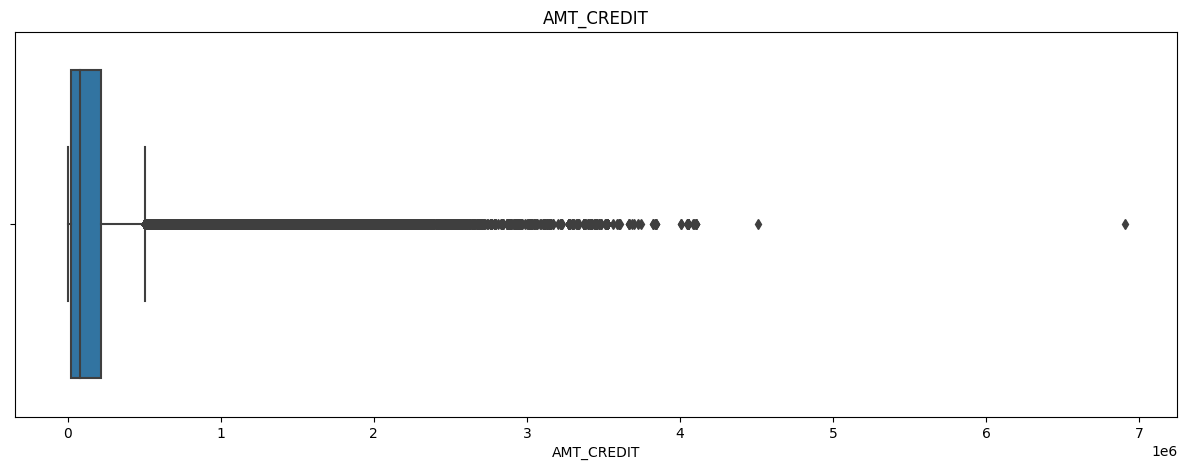

In [48]:
plt.figure(figsize = (15,5))
sns.boxplot(x = previous_data['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

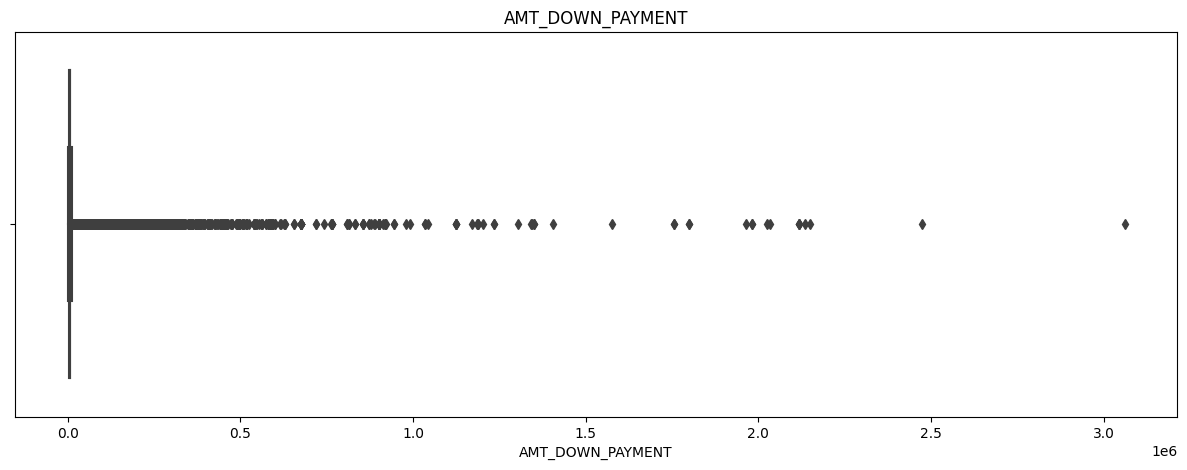

In [49]:
plt.figure(figsize = (15,5))
sns.boxplot(x = previous_data['AMT_DOWN_PAYMENT'])
plt.title('AMT_DOWN_PAYMENT')
plt.show()

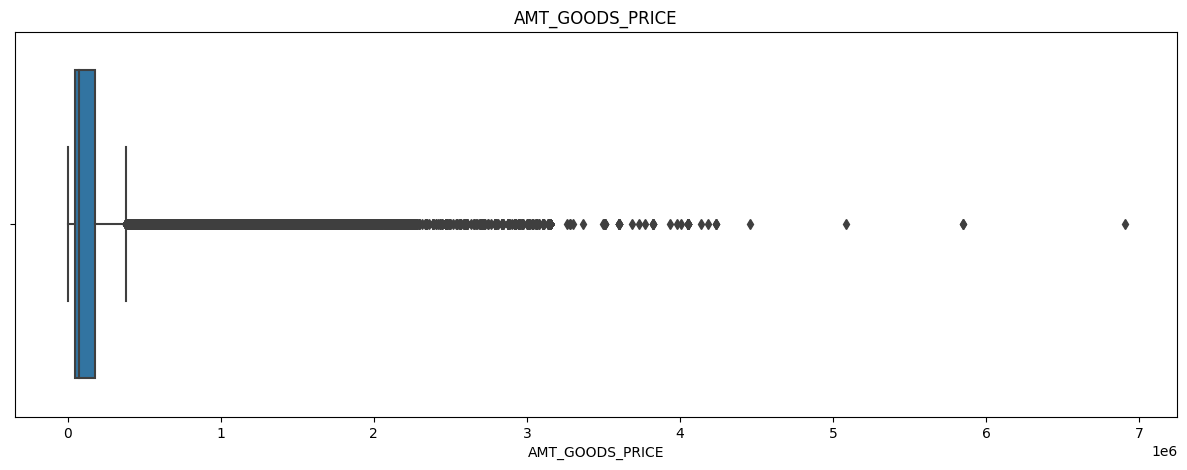

In [50]:
plt.figure(figsize = (15,5))
sns.boxplot(x = previous_data['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
plt.show()

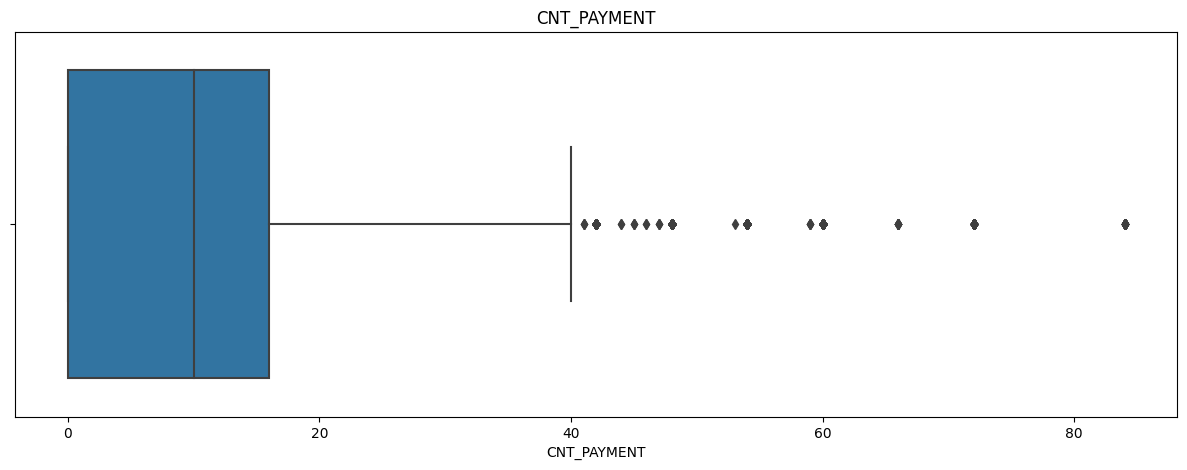

In [51]:
plt.figure(figsize = (15,5))
sns.boxplot(x = previous_data['CNT_PAYMENT'])
plt.title('CNT_PAYMENT')
plt.show()

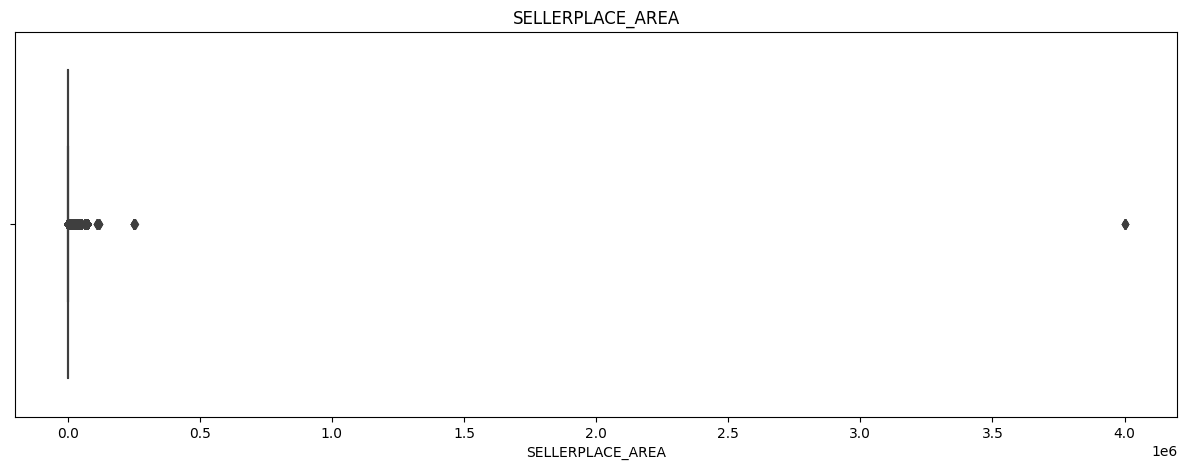

In [52]:
plt.figure(figsize = (15,5))
sns.boxplot(x = previous_data['SELLERPLACE_AREA'])
plt.title('SELLERPLACE_AREA')
plt.show()

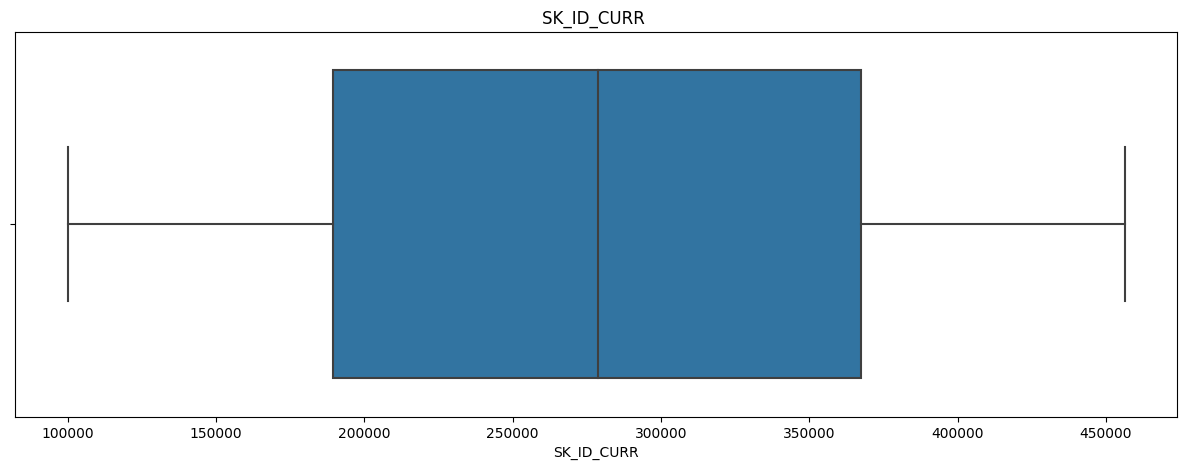

In [53]:
plt.figure(figsize = (15,5))
sns.boxplot(x = previous_data['SK_ID_CURR'])
plt.title('SK_ID_CURR ')
plt.show()

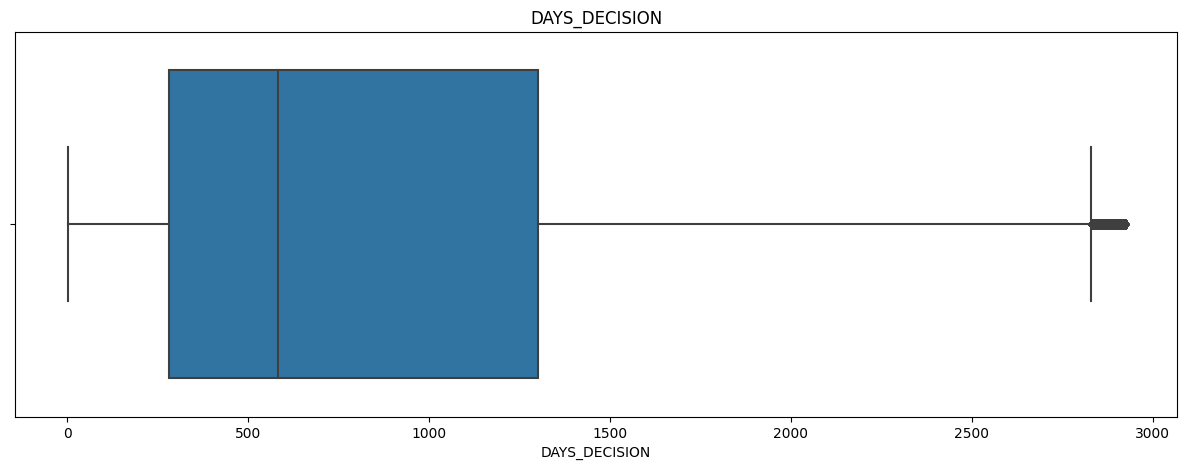

In [55]:
plt.figure(figsize = (15,5))
sns.boxplot(x = previous_data['DAYS_DECISION'])
plt.title('DAYS_DECISION')
plt.show()

In [56]:
previous_data[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 
                      'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe().style.background_gradient() 

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1670214.000000,1670214.000000,1670214.000000,1670214.000000,1670214.000000,1670214.000000,1670214.000000
mean,14906.506177,175233.860360,196113.903799,185642.885791,313.951115,12.476210,880.679668
std,13177.514097,292779.762386,318574.557319,287141.316090,7127.443459,14.475882,779.099667
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000
25%,7547.096250,18720.000000,24160.500000,45000.000000,-1.000000,0.000000,280.000000
50%,11250.000000,71046.000000,80541.000000,71050.500000,3.000000,10.000000,581.000000
75%,16824.026250,180360.000000,216418.500000,180405.000000,82.000000,16.000000,1300.000000
max,418058.145000,6905160.000000,6905160.000000,6905160.000000,4000000.000000,84.000000,2922.000000


*Insight:*

1. AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.

2. CNT_PAYMENT has few outlier values.

3. SK_ID_CURR is an ID column and hence no outliers.

4. DAYS_DECISION has few number of outliers indicating that these previous applications decisions were taken long back. 

#**Data Imbalance**

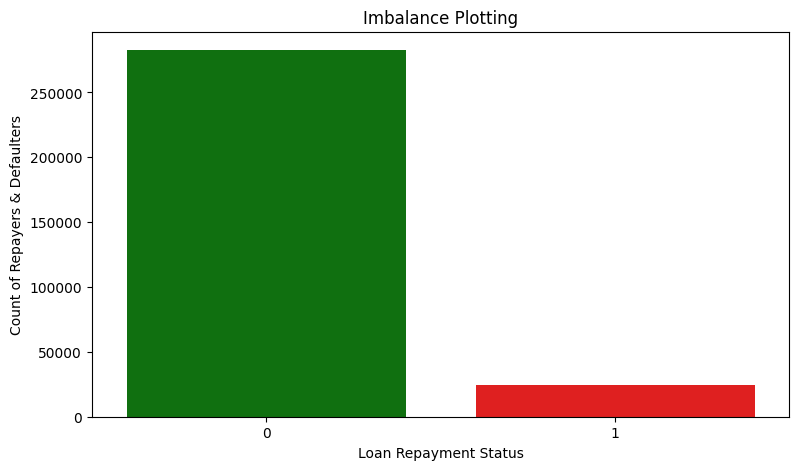

In [64]:
imbalance = application_data["TARGET"].value_counts().reset_index()

plt.figure(figsize=(9,5))
x = imbalance["index"] # set x to the "index" column of imbalance
sns.barplot(x=x, y="TARGET", data=imbalance, palette=['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()


#**Univariate Analysis**

In [65]:
# Calculating Imbalance percentage

count_0 = imbalance.iloc[0]["TARGET"]
count_1 = imbalance.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.93 and 8.07
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.39


In [66]:
#Segmenting dataset w.r.t to target variable
target0_Application_Data=application_data.loc[application_data["TARGET"]==0] # With other cases (defaulters)
target1_Application_Data=application_data.loc[application_data["TARGET"]==1] # With payment difficulties (Repayers)

print('The imbalance ratio :' ,round(len(target0_Application_Data)/len(target1_Application_Data),2))

The imbalance ratio : 11.39


In [67]:
# Count plotting in logarithmic scale

def uniplot(application_data,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams['axes.titlesize'] = 11
    plt.rcParams['axes.titlepad'] = 15
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(application_data[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = application_data, x= col, order=application_data[col].value_counts().index,
                       hue = hue,palette=["red", "blue"]) 
        
    plt.show()

# ***Univariate Analysis for target 0***

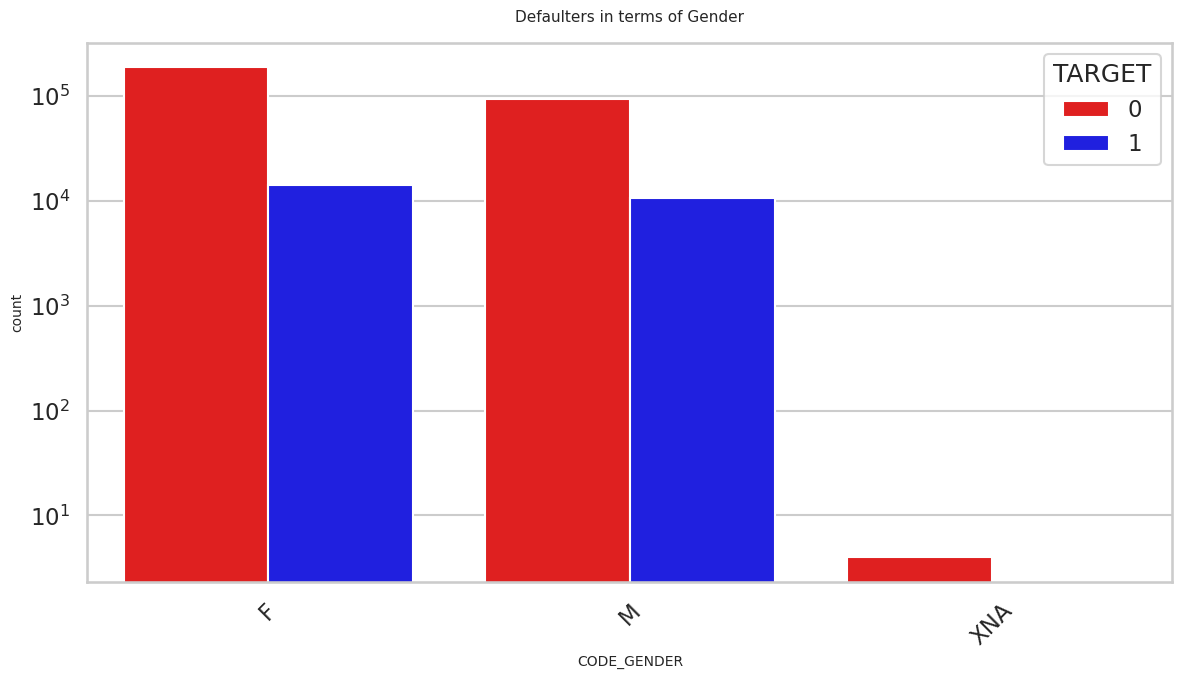

In [68]:
# PLotting for gender with target 1 and 0
uniplot(application_data,col='CODE_GENDER',title='Defaulters in terms of Gender',hue='TARGET')

<Axes: ylabel='CODE_GENDER'>

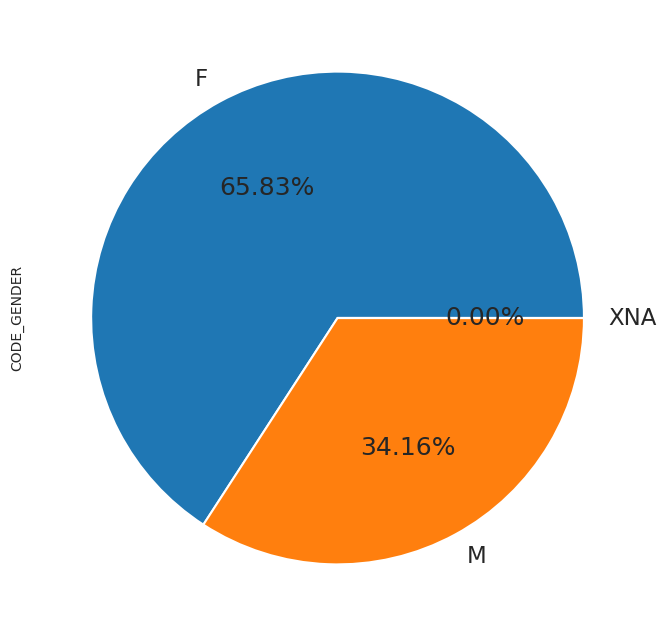

In [69]:
# PLotting for gender 
plt.figure(figsize = (8,8))
application_data['CODE_GENDER'].value_counts().plot(kind = 'pie', autopct='%1.2f%%')

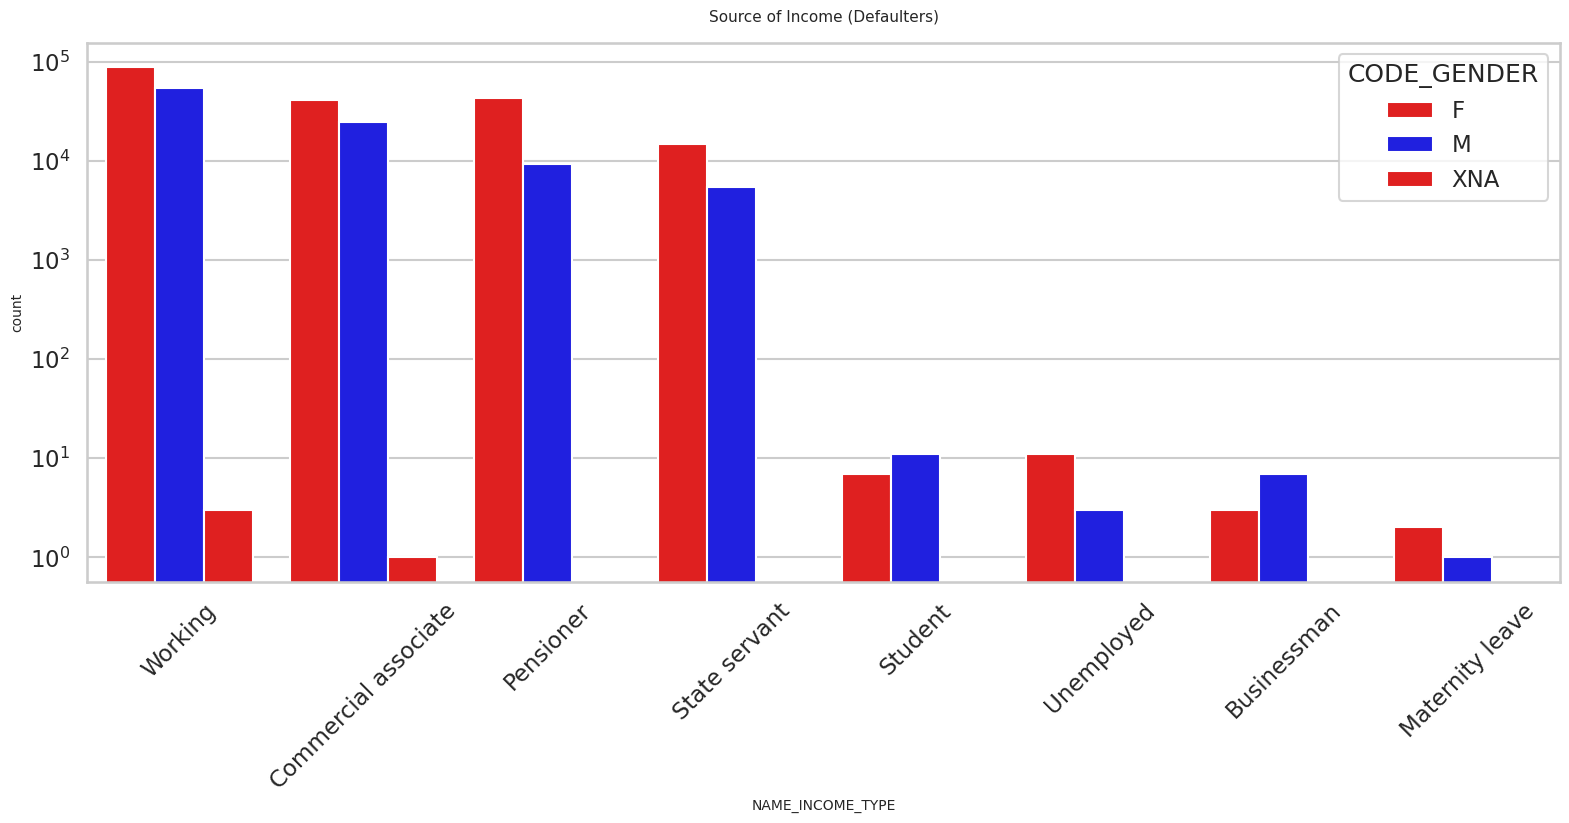

In [70]:
# PLotting for income range
uniplot(target0_Application_Data,col='NAME_INCOME_TYPE',title='Source of Income (Defaulters)',hue='CODE_GENDER')

In [71]:
target0_Application_Data['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                 50.780725
Commercial associate    23.438373
Pensioner               18.529393
State servant            7.235590
Student                  0.006367
Unemployed               0.004952
Businessman              0.003537
Maternity leave          0.001061
Name: NAME_INCOME_TYPE, dtype: float64

*Insight:*
1. Most of Females have 'Working' as source of income.
2. As compared to male, females are in larger number in terms of not repaying the loan.
3. Meanwhile, Commercial Associates (both female and males) have great contribution in defaulters.
4. Maternity leave people have least defaulter values.

In [72]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount in term of Lakhs
application_data['AMT_INCOME_TOTAL']=application_data['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [73]:
amt_range = round((application_data["AMT_INCOME_RANGE"].value_counts(normalize = True)*100),2)
amt_range

1L-2L        50.73
2L-3L        21.21
0-1L         20.73
3L-4L         4.78
4L-5L         1.74
5L-6L         0.36
6L-7L         0.28
8L-9L         0.10
7L-8L         0.05
9L-10L        0.01
10L Above     0.01
Name: AMT_INCOME_RANGE, dtype: float64

Text(0.5, 0, 'AMT_INCOME_RANGE')

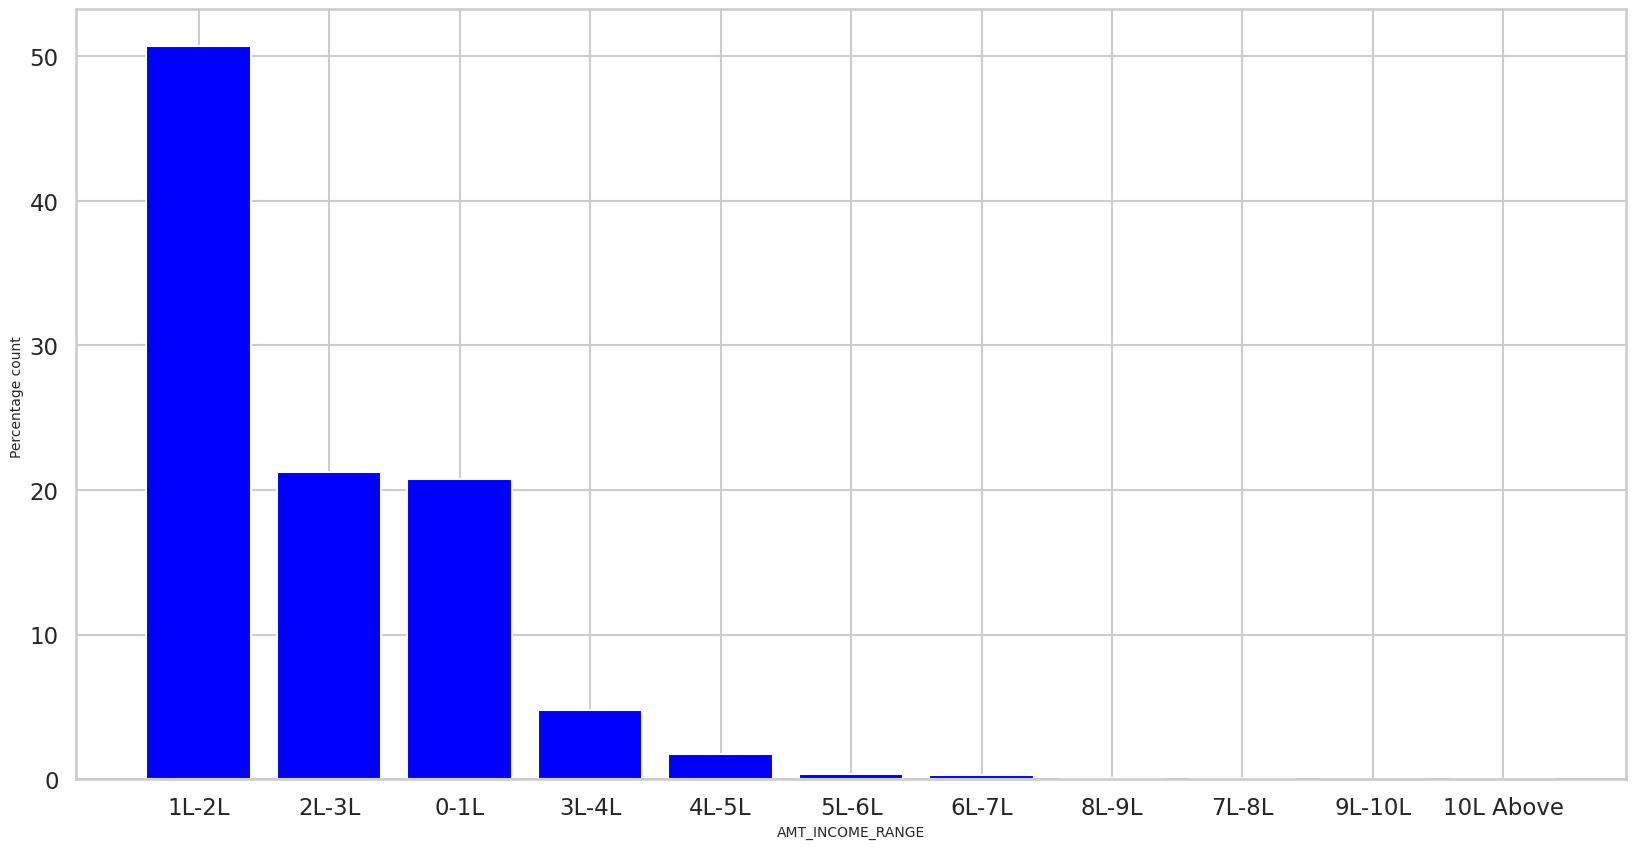

In [74]:
plt.figure(figsize = (20,10))
plt.bar(amt_range.keys(), amt_range, color = 'blue')
plt.ylabel("Percentage count ")
plt.xlabel("AMT_INCOME_RANGE")

<Axes: ylabel='NAME_CONTRACT_TYPE'>

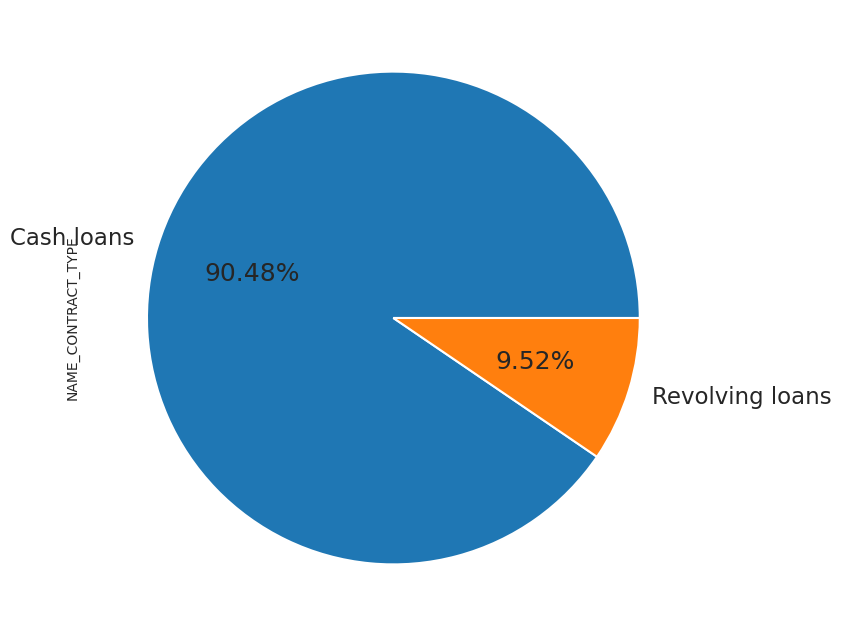

In [75]:
# Plotting for Contract type

plt.figure(figsize = (8,8))
application_data['NAME_CONTRACT_TYPE'].value_counts().plot(kind = 'pie', autopct='%1.2f%%')

*Insight*
1. Hence as compare to revolving loans, cash loans are taken in bulk
2. Almost clients applied for cash loan later they turned into defaulters

<Axes: ylabel='FLAG_OWN_CAR'>

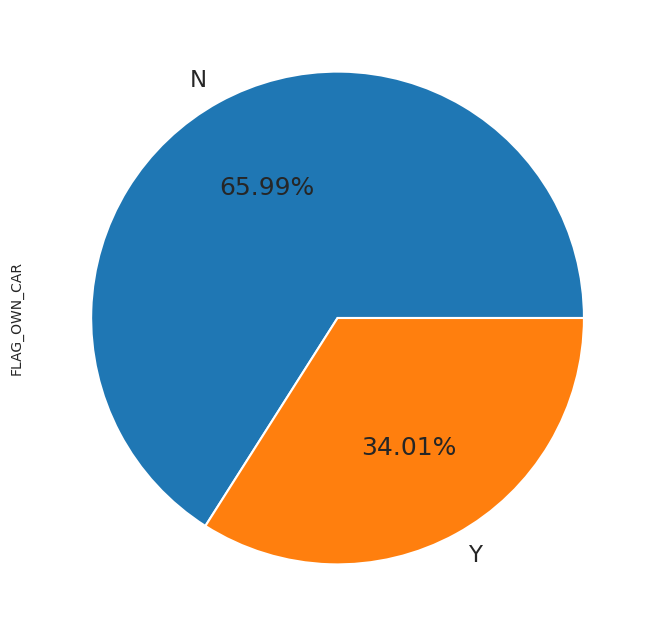

In [76]:
plt.figure(figsize = (8,8))
application_data['FLAG_OWN_CAR'].value_counts().plot(kind = 'pie', autopct='%1.2f%%')

<Axes: ylabel='FLAG_OWN_REALTY'>

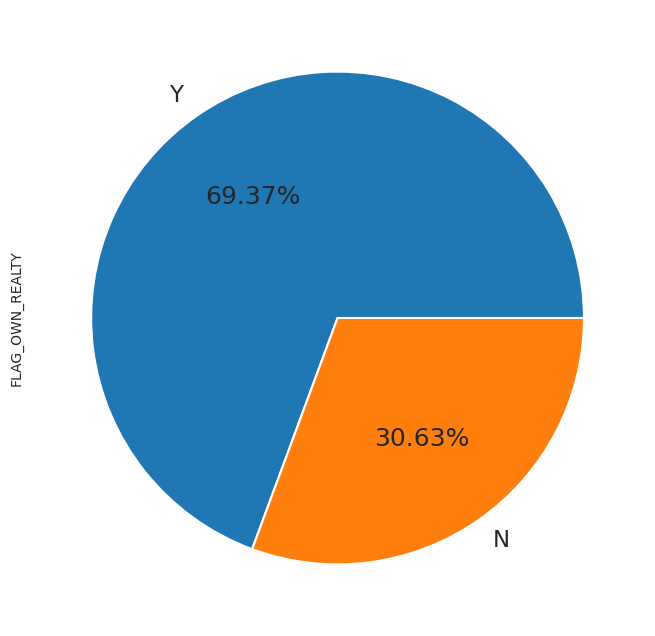

In [77]:
plt.figure(figsize = (8,8))
application_data['FLAG_OWN_REALTY'].value_counts().plot(kind = 'pie', autopct='%1.2f%%')

*Insights:*

1. Clients having no car have more defaulter rate
2. In case of not returning loan, clients having a house or flat in large number.

<Axes: xlabel='count', ylabel='ORGANIZATION_TYPE'>

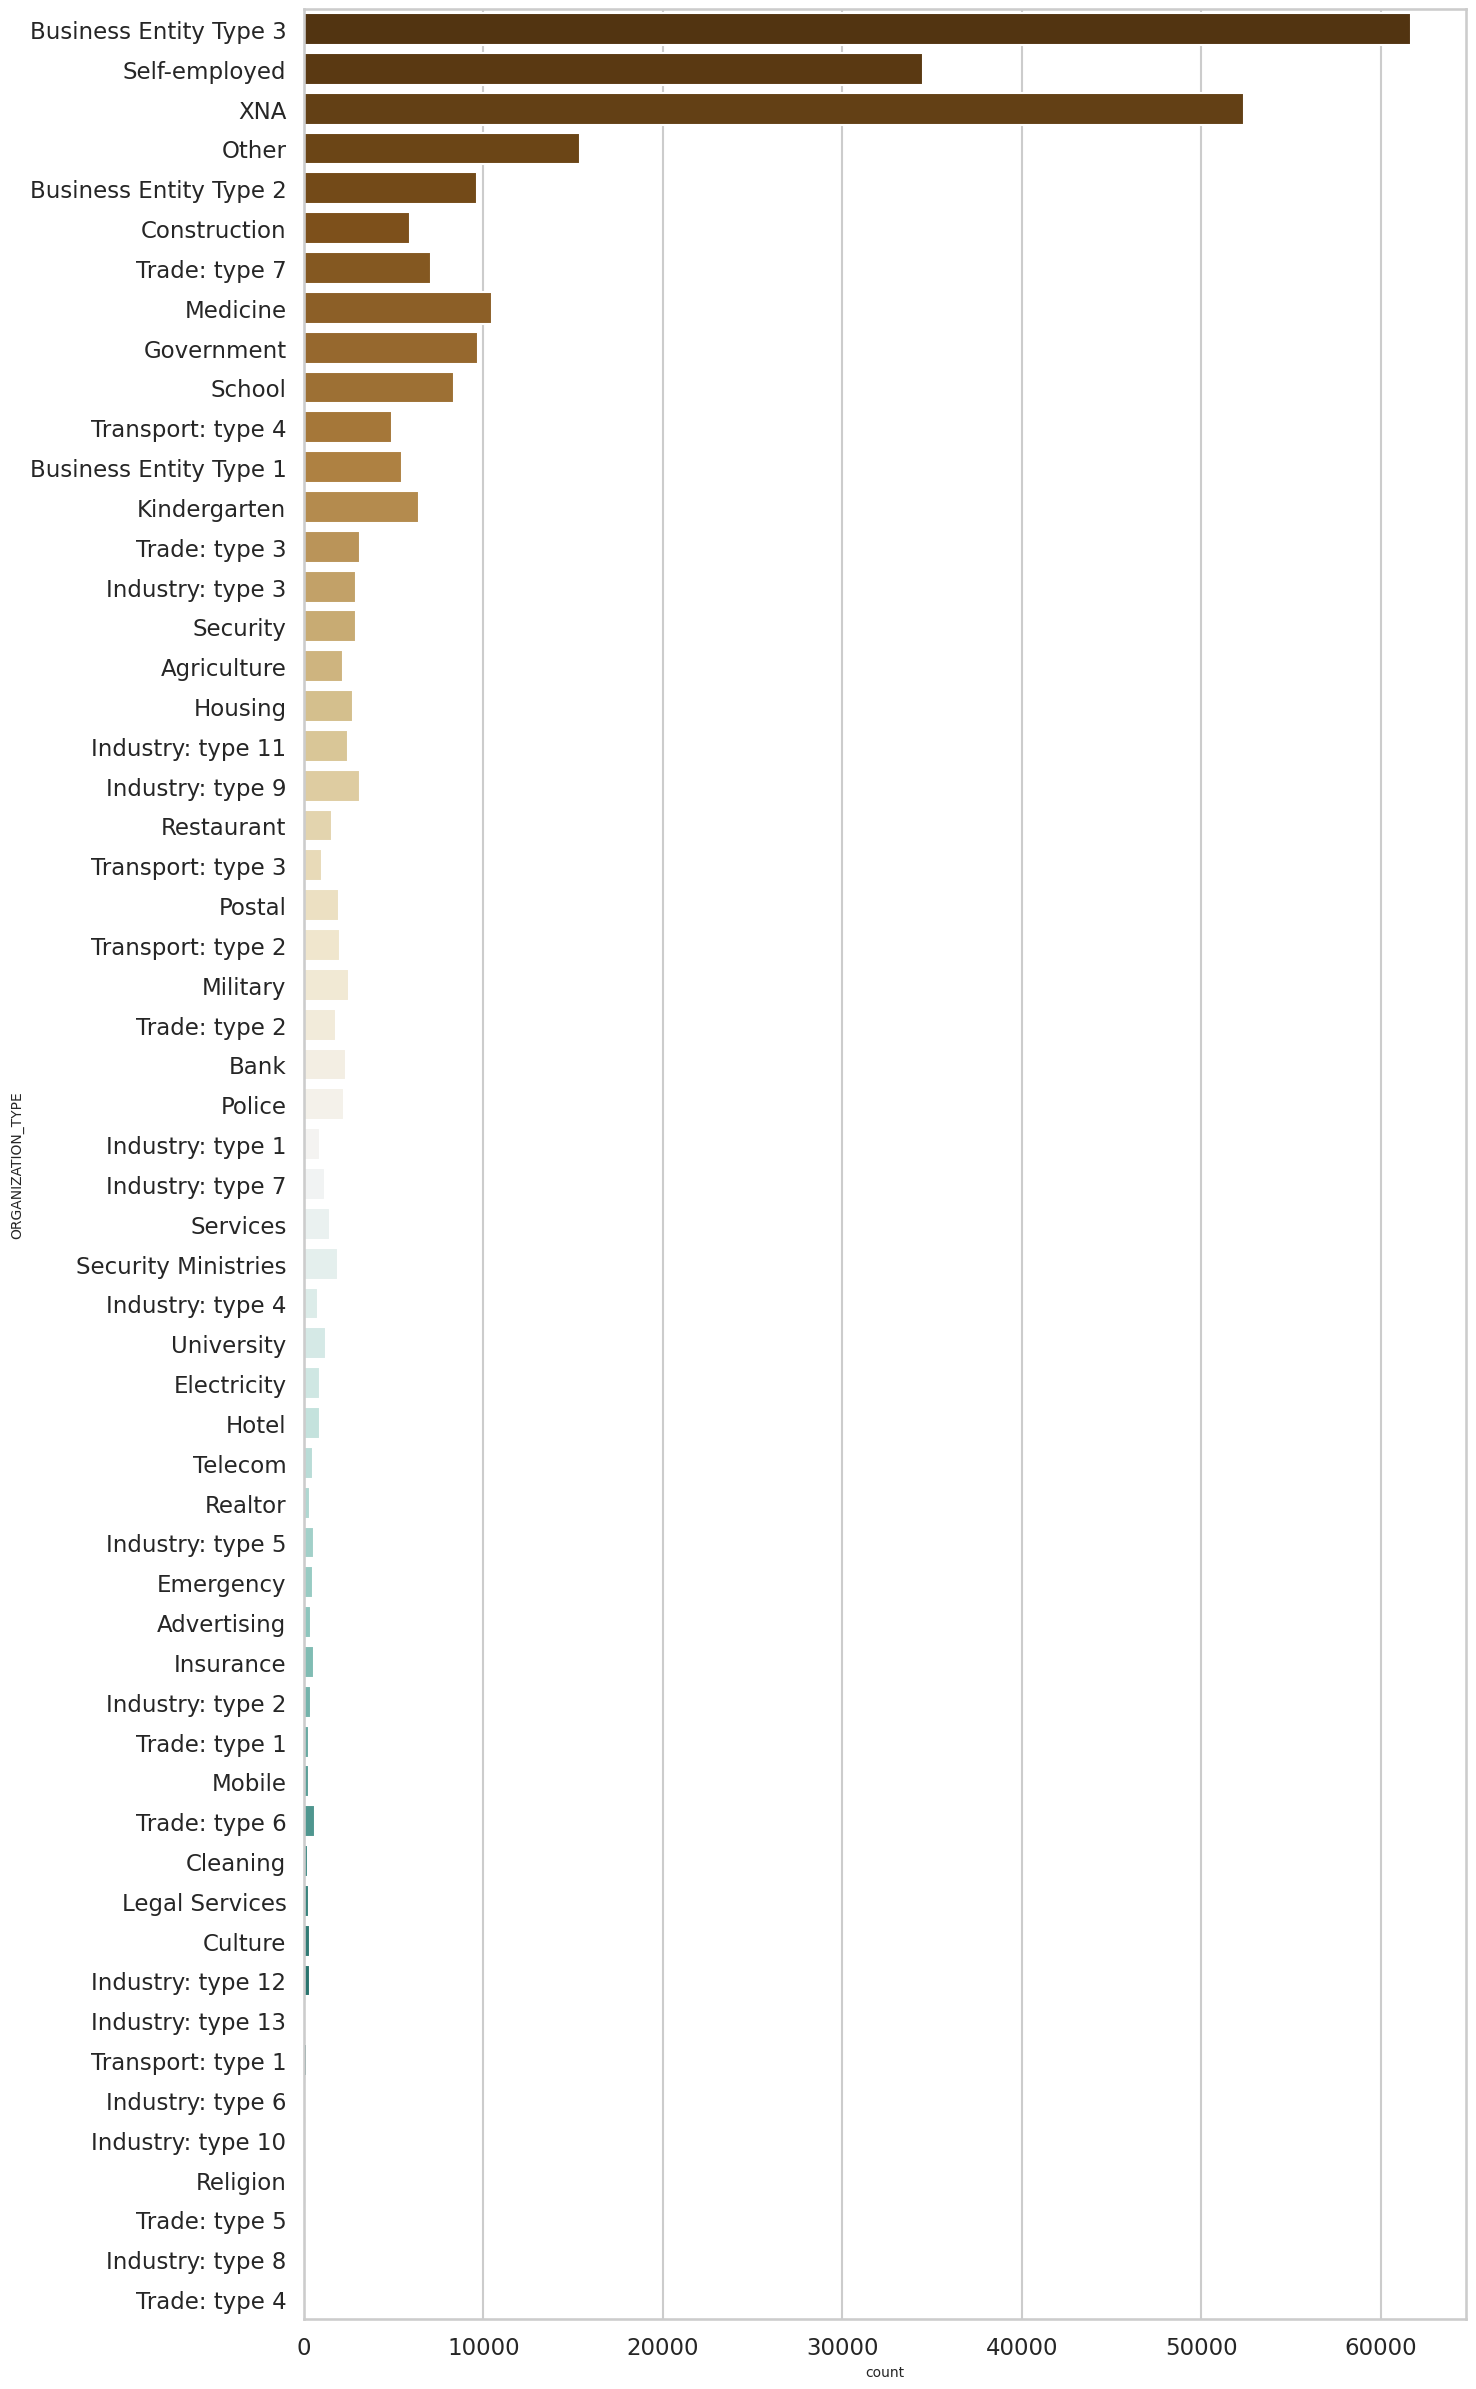

In [78]:
#Organization type counts in case of TARGET-0 (not repaying loan)

plt.figure(figsize=(15,30))
sns.countplot(data=target0_Application_Data,y='ORGANIZATION_TYPE',
              order=target1_Application_Data['ORGANIZATION_TYPE'].value_counts().index,palette='BrBG')


*Insight*
* Business Entity type 3 people have a big bar in defaulter case followed by Self-Employed people and other.

#  ***Univariate Analysis for target 1***

Text(0.5, 1.0, 'Defaulters in terms of gender')

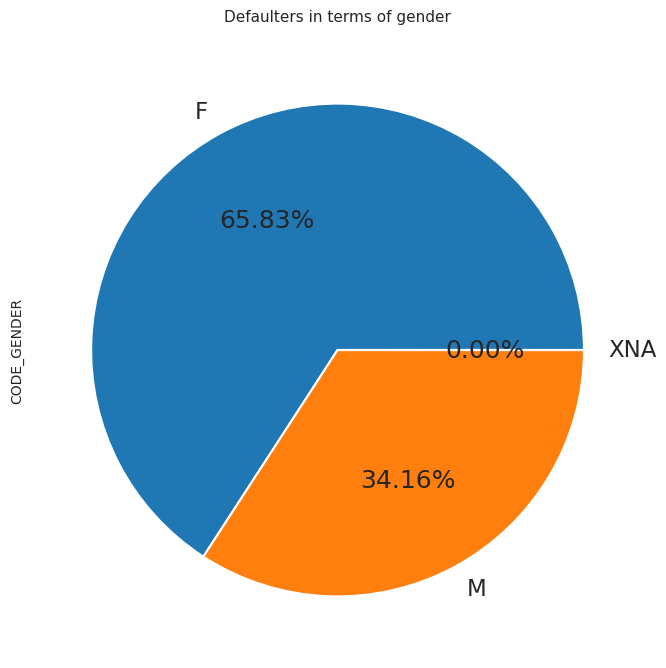

In [79]:
# PLotting for gender 

plt.figure(figsize = (8,8))
application_data['CODE_GENDER'].value_counts().plot(kind = 'pie', autopct='%1.2f%%')
plt.title("Defaulters in terms of gender")

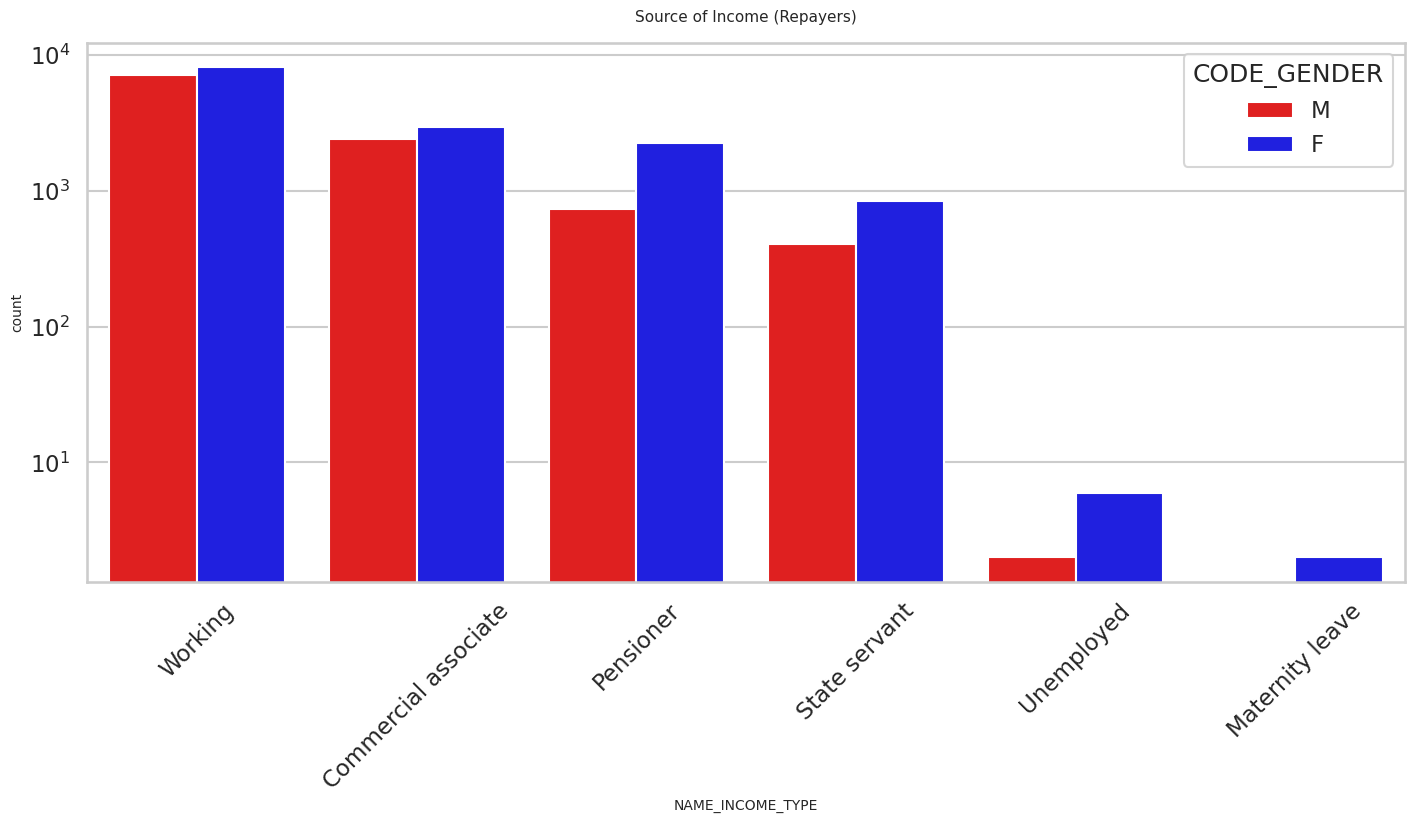

In [80]:
# PLotting for income range

uniplot(target1_Application_Data,col='NAME_INCOME_TYPE',title='Source of Income (Repayers)',hue='CODE_GENDER')

In [81]:
target1_Application_Data['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64

*Insights*
1. Here students and businessmen are missing where as people with 'working' as source income are leading.
2. In terms of repaying loan, percentage of people got increased from 50% in defaulter rate to 61% in reapayment.

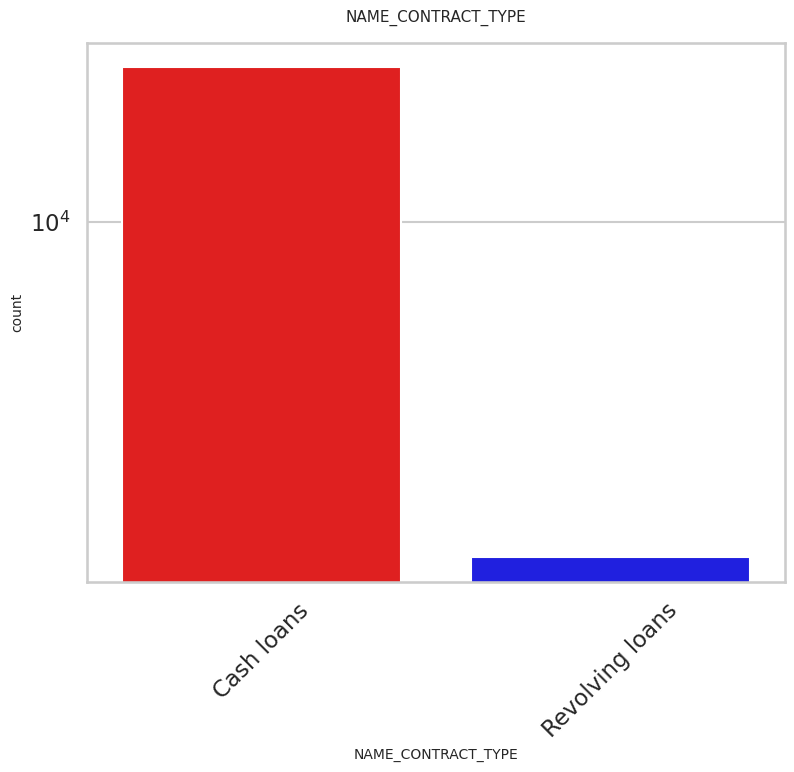

In [82]:
# PLotting for income range
uniplot(target1_Application_Data,col='NAME_CONTRACT_TYPE',title='NAME_CONTRACT_TYPE')

In [83]:
target1_Application_Data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

Cash loans         93.538771
Revolving loans     6.461229
Name: NAME_CONTRACT_TYPE, dtype: float64

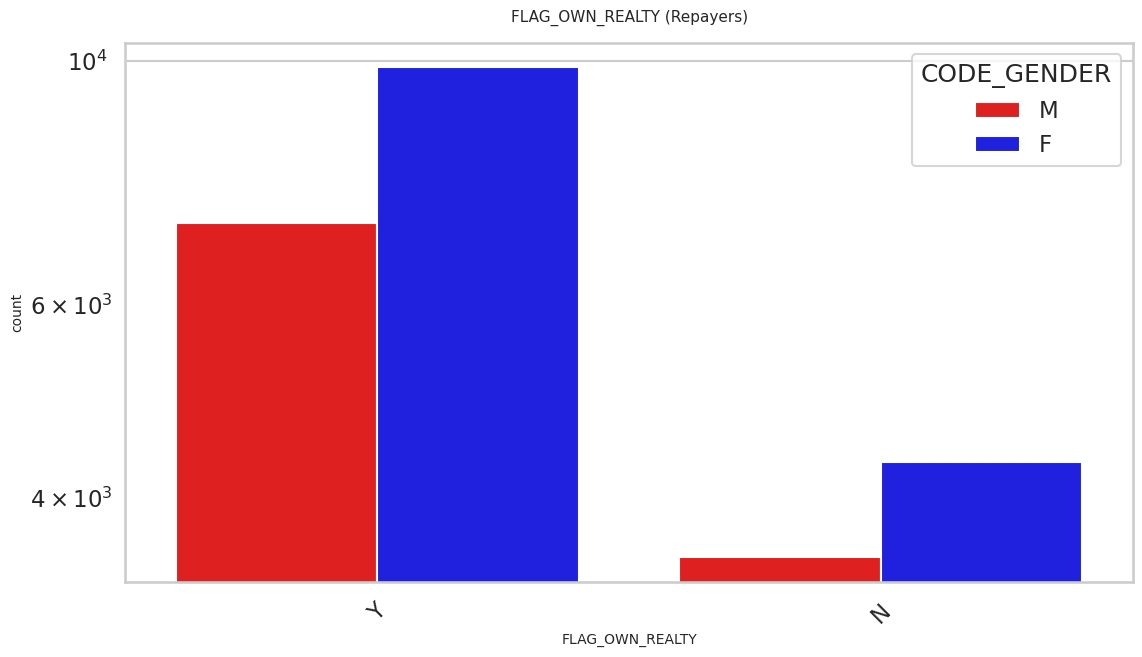

In [84]:
uniplot(target1_Application_Data,col='FLAG_OWN_REALTY',title='FLAG_OWN_REALTY (Repayers)',hue='CODE_GENDER')

*Insights*
1. Females who don't have a car have big chance of repaying the loan and vice versa.
2. Males owning no any flat or house have less chance of returning the loan.

<Axes: xlabel='count', ylabel='ORGANIZATION_TYPE'>

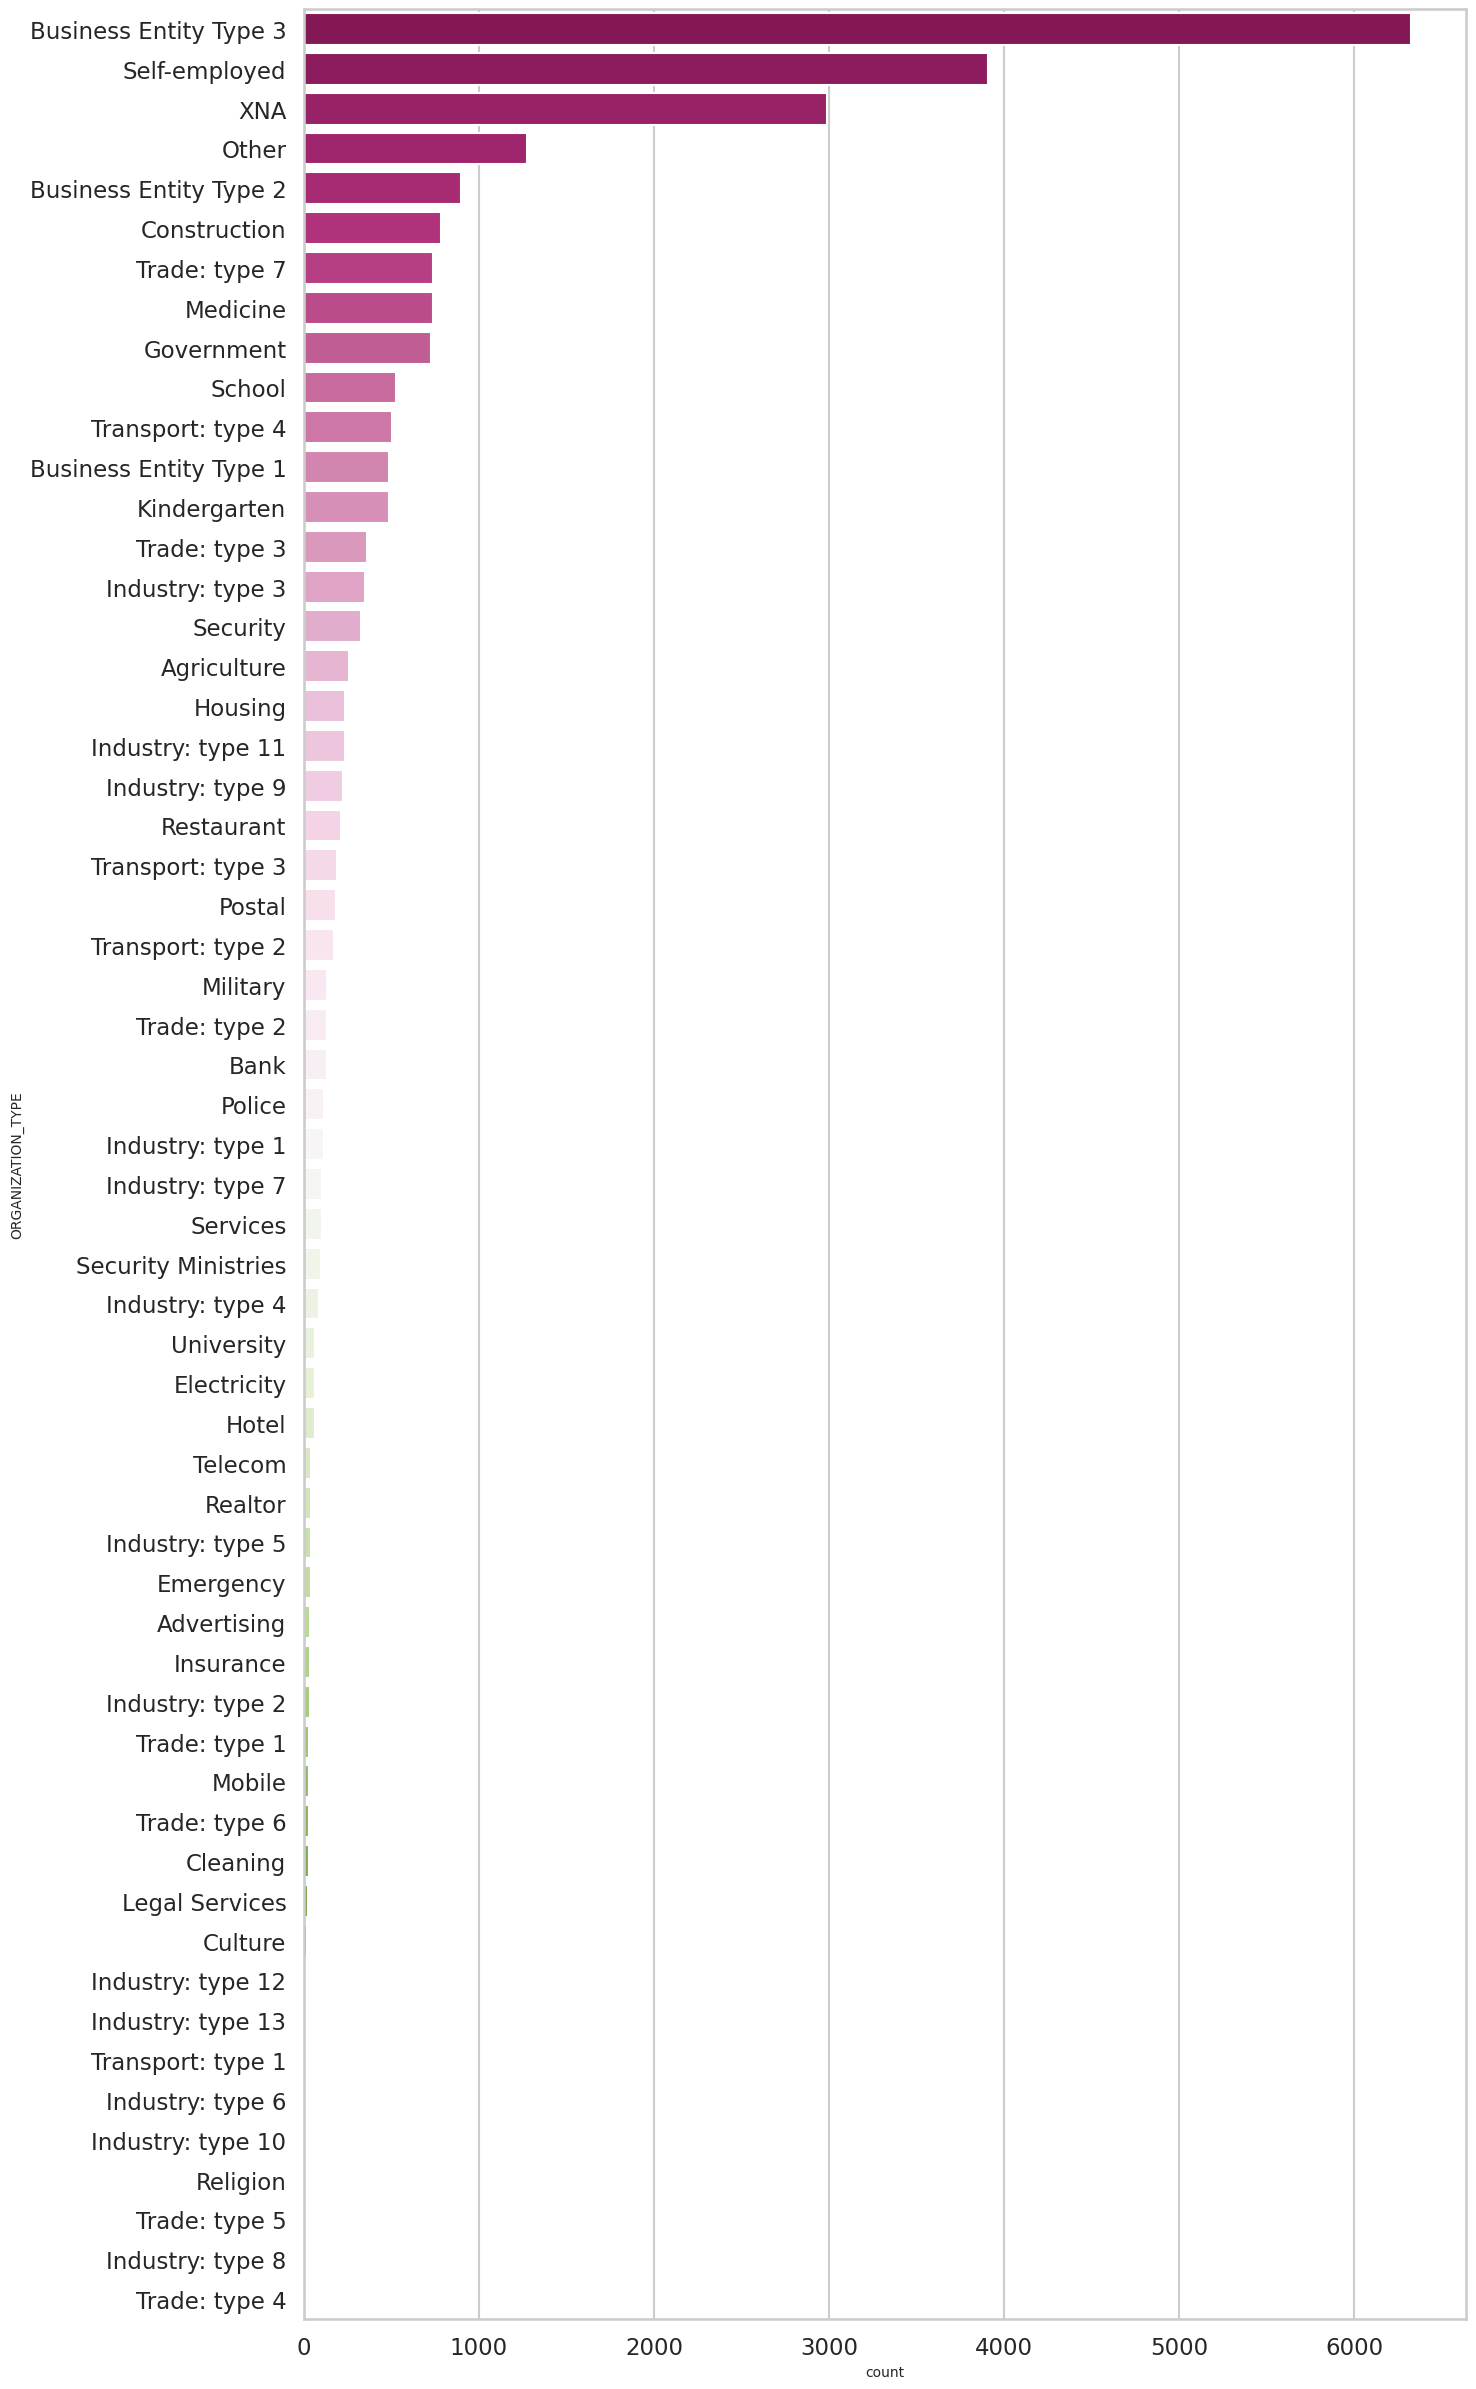

In [85]:
#Organization type counts in case of TARGET-1 (payed loan)
plt.figure(figsize=(15,30))
sns.countplot(data=target1_Application_Data,y='ORGANIZATION_TYPE'
              ,order=target1_Application_Data['ORGANIZATION_TYPE'].value_counts().index,palette='PiYG')

In [86]:
target1_Application_Data['FLAG_OWN_CAR'].value_counts(normalize=True)*100

N    69.482377
Y    30.517623
Name: FLAG_OWN_CAR, dtype: float64

In [87]:
target1_Application_Data['FLAG_OWN_REALTY'].value_counts(normalize=True)*100

Y    68.410876
N    31.589124
Name: FLAG_OWN_REALTY, dtype: float64

*Insights:*
1. loan applicants not having a car are in better numbers in repayment status (69%).
2. Loan applicants owning a house or flat are also in good number (68%).

# **Bivariate Analysis**

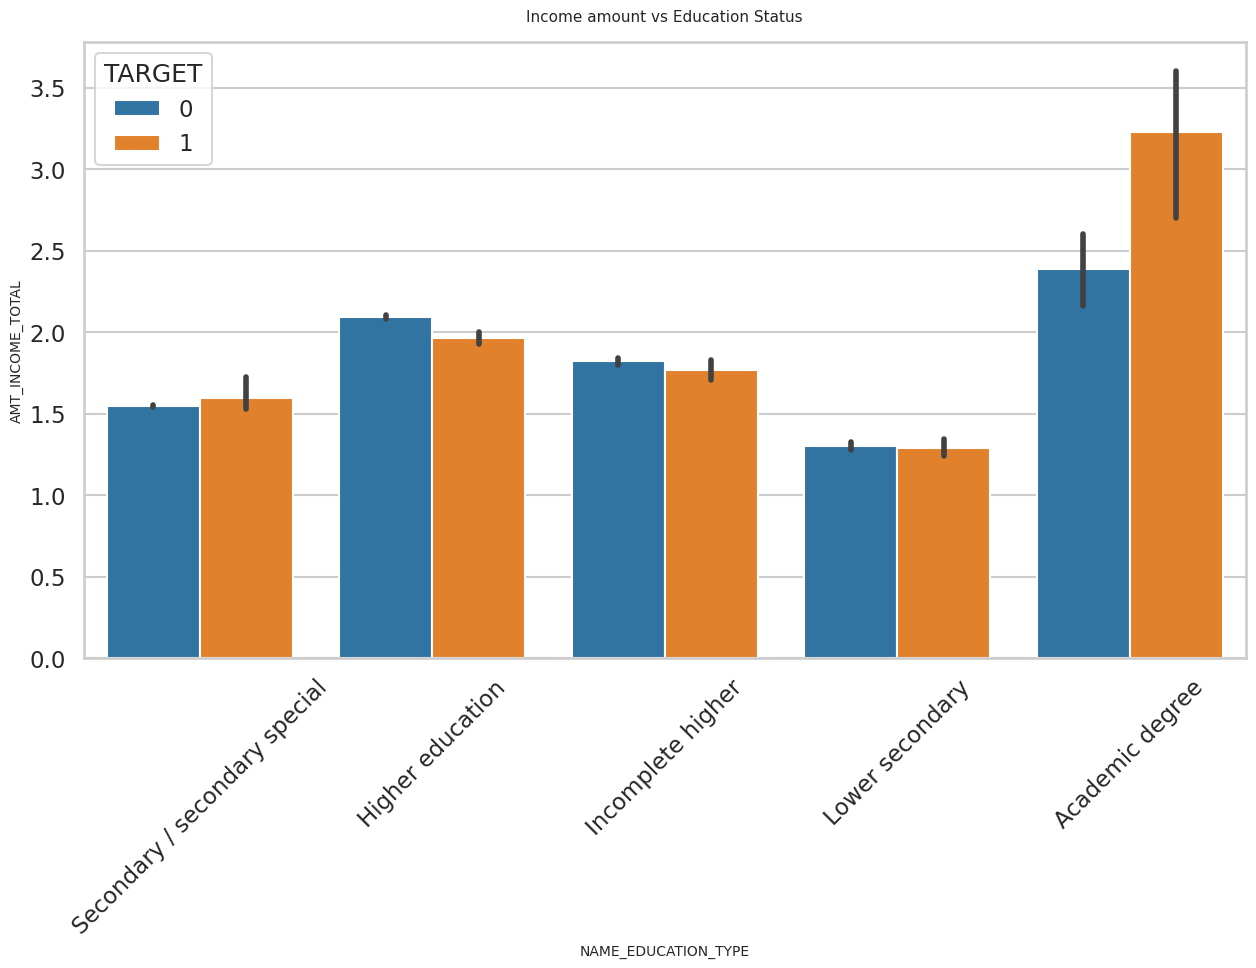

In [88]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.barplot(data =application_data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='TARGET',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

*Insigths*
1. Clients having academic degree have the most income have more counts in defaulters than repayers.
2. Clients educated from lower secondary are equal number of counts in defaulters adn repayers.

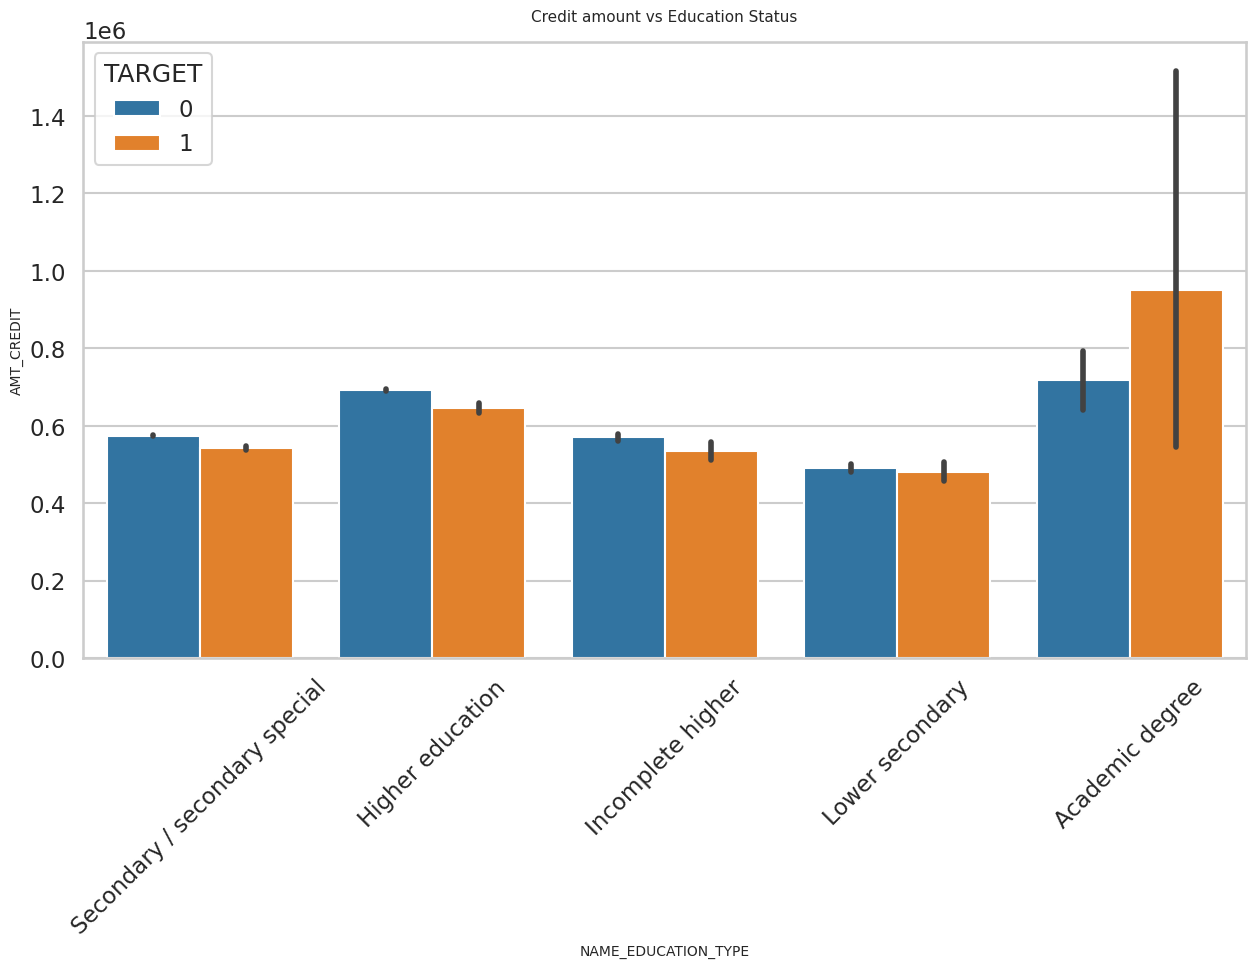

In [89]:
# Box plotting for Credit amount

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.barplot(data =application_data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='TARGET',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

* Academic degree people are safe side of giving loans as they have credited huge amount and they have returned less than credited amount to the company.

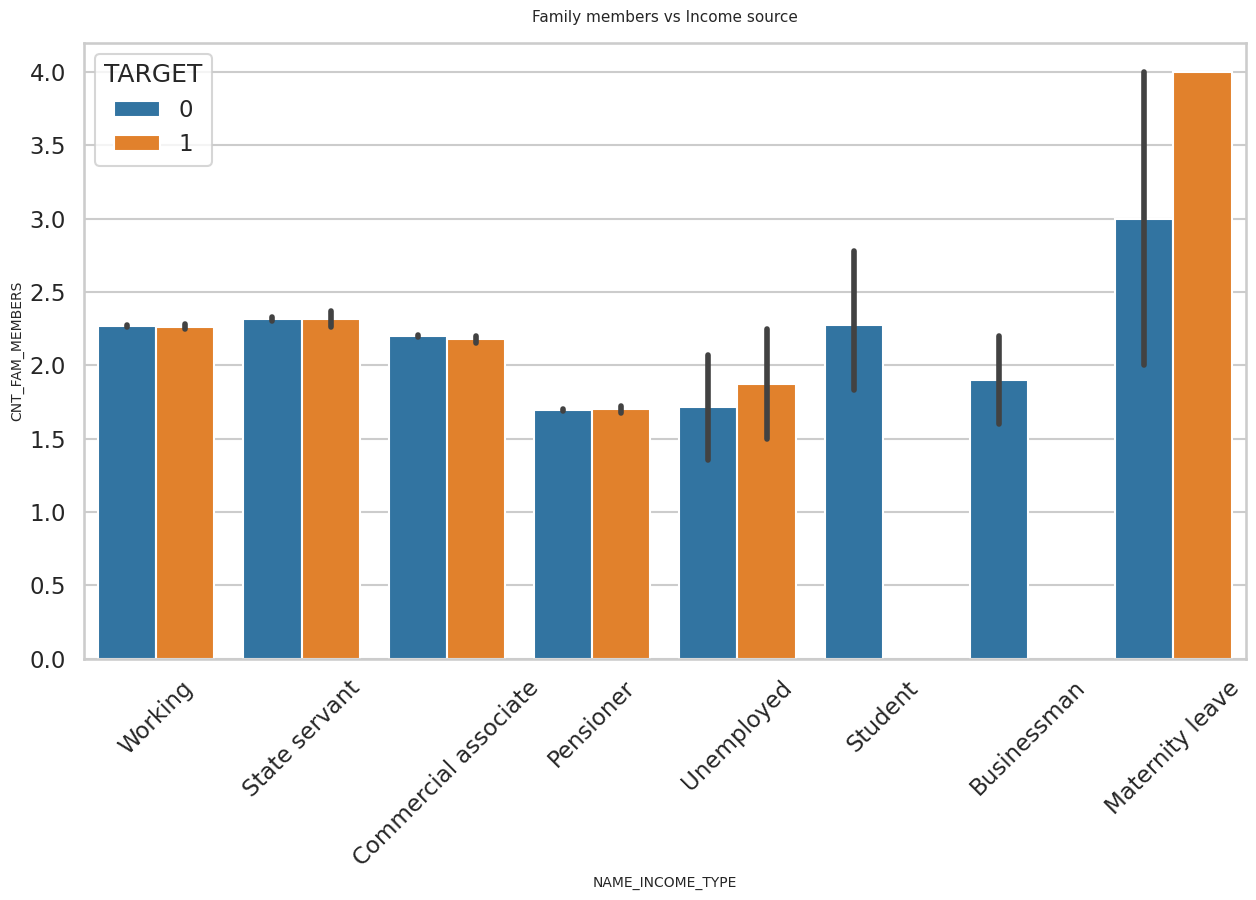

In [90]:
# Box plotting for Income source in logarithmic scale

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.barplot(data =application_data, x='NAME_INCOME_TYPE',y='CNT_FAM_MEMBERS', hue ='TARGET',orient='v')
plt.title('Family members vs Income source')
plt.show()

*Insights*
1. Working people having 2 family members are equal number of repayers and defaulters,
2. People who geting income through Maternity Leave tends to be more Defaulter when they have more Family Members

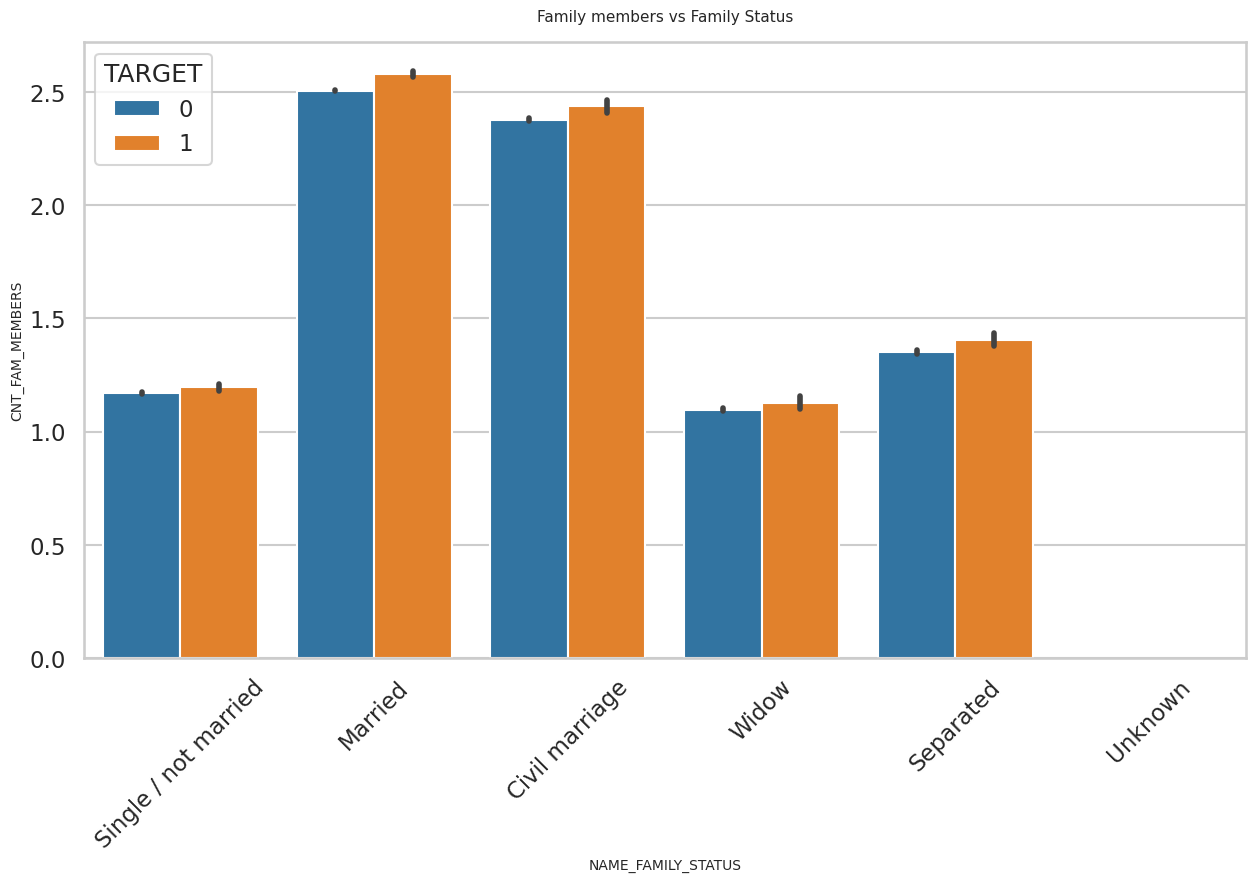

In [91]:
# Box plotting for Income source in logarithmic scale

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.barplot(data =application_data, x='NAME_FAMILY_STATUS',y='CNT_FAM_MEMBERS', hue ='TARGET',orient='v')
plt.title('Family members vs Family Status')
plt.show()

* Married people are high in defaulter counts as they have more childrens this may be a reason of defaulting.